<a href="https://colab.research.google.com/github/naiyajpatel/library_late_return_analysis/blob/main/Library_late_return_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Book Return Analysis:

**Problem Statement:**

A local public library is experiencing a high number of late book returns, which negatively impacts circulation efficiency and user satisfaction. This project aims to analyze borrowing data to understand the rate and patterns of late returns. Using data-driven insights, the goal is to identify key factors contributing to late returns and recommend actionable strategies the library can adopt to reduce them. The analysis includes visualizations, summary statistics, and predictive modeling to support decision-making and improve library operations.

**Importing Data for analysis**

In [578]:
# importing python libraries for performing further analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visualization library

In [579]:
# mounting google drive to colab to extract data files from My Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [580]:
# uploading/extracting files from My Drive by assigning path for each file
# uploading Library.csv file in dataframe
path = '/content/drive/MyDrive/libraries.csv'
df_lib = pd.read_csv(path)

In [581]:
# uploading checkout.csv file in dataframe
df_checkout = pd.read_csv('/content/drive/MyDrive/checkouts.csv')

In [582]:
# uploading customers.csv file in dataframe
df_cust = pd.read_csv('/content/drive/MyDrive/customers.csv')

In [583]:
# uploading books.csv file in dataframe
df_books = pd.read_csv('/content/drive/MyDrive/books.csv')

# Exploratory Data Analysis of Libraries dataset:

In [584]:
# checking shape of dataset
df_lib.shape

(18, 6)

In [585]:
# checking all rows of dataset as it only has 18 rows
df_lib.head(18)

,id,name,street_address,city,region,postal_code
0,226-222@5xc-kc4-fpv,Multnomah County Library Capitol Hill,10723 SW capitol Hwy,Portland,OR,97219
1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,NaN,or,NaN
2,222-222@5xc-jvf-skf,Multnomah County Library St Johns,7510 N Charleston Ave,portland,or,97203
3,227-222@5xc-jww-btv,Multnomah County Library Hillsdale,1525 SW Sunset blvd,Portland,or,-97239
4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 SE 13th AVE,Portland,OR,97202
5,223-222@5xc-jxr-tgk,MULTNOMAH County Library Woodstock,6008 se 49TH AVE,Portland,OR,-97206
6,zzw-224@5xc-jwv-2rk,Multnomah County Library Central,801 SW 10th Ave,Portland,NaN,97205
7,zzw-223@5xc-jv7-ct9,Friends OF the multnomah COUNTY Library,522 SW 5th Ave,NaN,OR,97204
8,226-222@5xc-jxj-7yv,Multnomah County Library Belmont,1038 SE CESAR E CHAVEZ blvd,Portland,OR,97214
9,zzw-222@5xc-knn-c5z,Multnomah County Library Holgate,7905 SE Holgate Blvd,Portland,OR,NaN


In [586]:
# checking info dtypes
df_lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              18 non-null     object
 1   name            18 non-null     object
 2   street_address  18 non-null     object
 3   city            14 non-null     object
 4   region          16 non-null     object
 5   postal_code     15 non-null     object
dtypes: object(6)
memory usage: 996.0+ bytes


In [587]:
# checking description of dataset
df_lib.describe(include='all').T

,count,unique,top,freq
id,18,18,226-222@5xc-kc4-fpv,1
name,18,18,Multnomah County Library Capitol Hill,1
street_address,18,18,10723 SW capitol Hwy,1
city,14,5,Portland,5
region,16,4,OR,9
postal_code,15,14,#97217,2


In [588]:
# checking null counts
df_lib.isnull().sum()

,0
id,0
name,0
street_address,0
city,4
region,2
postal_code,3


**Observations from early EDA:**

1. Library dataset has 18 rows and 6 columns
2. Most of libraries belong to Portland, Oregon
3. The dataset has 18 unique library id, names and addresses where as 5 unique cities which might be an error because it has only city name portland, 4 region which is also an error because it has oregon region for all, and 14 unique postal code
4. There are need of data cleaning and filtering for following

*   Assumptions (City): As we saw most libraries belongs to Portland,OR, It is safe to assume that nulls in city columns also belongs to same region
*   Region: As we see some region code is in small letter, we will transform it to upper case
*   Postal_code: As we can see lots of postal code contains irrelevant symbols which is why it was considered "object" dtype by notebook. We will clean it and transform into numeric dtype column
*   name: library name has uneven format, we will capitalize all name for better analysis


**Data Cleaning:**

In [589]:
# converting name of library to uppercase letter
df_lib['name'] = df_lib['name'].apply(lambda x: x.upper())

In [590]:
# converting nan to "Portland" in cities
# Reference: Google Maps
df_lib['city'] = df_lib['city'].fillna('Portland')

In [591]:
# converting all string to Capital Letters in city column
df_lib['city'] = df_lib['city'].apply(lambda x: x.upper())

In [592]:
# Replacing NaN in region to "OR" and capitalize all strings
df_lib['region'] = df_lib['region'].fillna('OR')
df_lib['region'] = df_lib['region'].apply(lambda x: x.upper())

In [593]:
# Replacing unnecessary symbols from postal code
df_lib['postal_code'] = df_lib['postal_code'].replace('[-, _, #]', '', regex=True) # regex allows to eliminate multiple condition
# Filling each NaN in postal code with reference to google map address cross check
df_lib.at[1,  'postal_code'] = '97210' # 'at' uses the index number to locate the row and replace it
df_lib.at[9,  'postal_code'] = '97206'
df_lib.at[12, 'postal_code'] = '97212'

# changing dtype of postal code to numberic
df_lib['postal_code'] = pd.to_numeric(df_lib['postal_code'])

In [594]:
# checking all rows are cleaned and filtered
df_lib.head(18)

,id,name,street_address,city,region,postal_code
0,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219
1,23v-222@5xc-jv7-v4v,MULTNOMAH COUNTY LIBRARY NORTHWEST,2300 NW Thurman St,PORTLAND,OR,97210
2,222-222@5xc-jvf-skf,MULTNOMAH COUNTY LIBRARY ST JOHNS,7510 N Charleston Ave,PORTLAND,OR,97203
3,227-222@5xc-jww-btv,MULTNOMAH COUNTY LIBRARY HILLSDALE,1525 SW Sunset blvd,PORTLAND,OR,97239
4,22d-222@5xc-kcy-8sq,MULTNOMAH COUNTY LIBRARY SELLWOOD MORELAND,7860 SE 13th AVE,PORTLAND,OR,97202
5,223-222@5xc-jxr-tgk,MULTNOMAH COUNTY LIBRARY WOODSTOCK,6008 se 49TH AVE,PORTLAND,OR,97206
6,zzw-224@5xc-jwv-2rk,MULTNOMAH COUNTY LIBRARY CENTRAL,801 SW 10th Ave,PORTLAND,OR,97205
7,zzw-223@5xc-jv7-ct9,FRIENDS OF THE MULTNOMAH COUNTY LIBRARY,522 SW 5th Ave,PORTLAND,OR,97204
8,226-222@5xc-jxj-7yv,MULTNOMAH COUNTY LIBRARY BELMONT,1038 SE CESAR E CHAVEZ blvd,PORTLAND,OR,97214
9,zzw-222@5xc-knn-c5z,MULTNOMAH COUNTY LIBRARY HOLGATE,7905 SE Holgate Blvd,PORTLAND,OR,97206


**Now, we have cleaned and filtered library dataset with no nulls. (Reference: Google Maps for address verification)**

**Final df_lib has following columns:**

id: library id

name: name of the library

street_address: Address of the library

city: city where library is located

region: region where library is located

postal_code: postal code of the library

# Exploratory Data Analysis of checkout dataset:

In [595]:
# checking shape of dataset
df_checkout.shape

(2000, 5)

In [596]:
# checking first five rows of checkout dataset
df_checkout.head()

,id,patron_id,library_id,date_checkout,date_returned
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23


In [597]:
# checking last five rows of dataset
df_checkout.tail()

,id,patron_id,library_id,date_checkout,date_returned
1995,rNbuDwAAQBAJ,91871955f3641857832766ac3f5a0b95,222-222@5xc-jv5-nt9,2018-07-19,2018-08-12
1996,rcrCAgAAQBAJ,ad08956eb20efb746af650f906d439cf,22d-222@5xc-kcy-8sq,2018-03-07,2018-03-13
1997,F44fAQAAMAAJ,026262cc3454149303074c4113b5f118,226-222@5xc-jxj-7yv,2018-06-17,2018-06-27
1998,Ci1HAQAAMAAJ,08b29865e58e9b2aabff9684a703acf0,223-222@5xc-jxr-tgk,2018-12-10,2018-12-29
1999,TUAyAQAAMAAJ,ac0bb7b22b4df999a0b1216ded727f8e,228-222@5xc-jtz-hwk,2018-10-10,2018-11-01


In [598]:
# checking info
df_checkout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2000 non-null   object
 1   patron_id      2000 non-null   object
 2   library_id     2000 non-null   object
 3   date_checkout  1935 non-null   object
 4   date_returned  1942 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [599]:
# checking description of dataset
df_checkout.describe(include='all').T

,count,unique,top,freq
id,2000,240,_L9IAAAAYAAJ,18
patron_id,2000,2000,b1fcf336edcdf1bfd4277f11b6d4cf22,1
library_id,2000,18,zzw-222@5xc-jv4-789,125
date_checkout,1935,573,2018-12-21,10
date_returned,1942,622,2018-07-30,13


In [600]:
# Checking nulls
df_checkout.isnull().sum()

,0
id,0
patron_id,0
library_id,0
date_checkout,65
date_returned,58


In [601]:
# checking duplicates
df_checkout.duplicated().sum()

np.int64(0)

**Observations:**

1. There are 2000 rows and 5 columns in this dataset
2. data_checkout column has 65 null values
3. data_returned column has 58 null values
4. We saw uneven date_time formate in date_checkout and date_returned, so we will normalize it.

*   Assumptions: As we have 65 date_checkout nulls and 58 date_returned nulls, we will drop those columns because we will not be able to calculate the late return rate for those columns.
*   First we will drop nulls and then fix the uneven date columns



In [602]:
# dropping nulls from dataset
df_checkout.dropna(inplace=True)

In [603]:
# checking null counts to verify if all nulls are dropped
df_checkout.isnull().sum()

,0
id,0
patron_id,0
library_id,0
date_checkout,0
date_returned,0


In [604]:
# checking shape after dropping off nulls
df_checkout.shape

(1877, 5)

In [605]:
# Now, we will change uneven date_checkout and date_returned and then convert column dtype to datetime format
# Attempt to convert; anything that can't be parsed becomes NaT
df_checkout['date_checkout_parsed'] = pd.to_datetime(df_checkout['date_checkout'], errors='coerce')

# Rows where conversion failed → "uneven" in the sense of "bad format"
bad_dates = df_checkout[df_checkout['date_checkout_parsed'].isna() & df_checkout['date_checkout'].notna()]

print("Rows with invalid or mismatched date formats:")
print(bad_dates[['date_checkout']])

Rows with invalid or mismatched date formats:
     date_checkout
107    2018/12/31 
124       20180629
142    %2018 06 04
163    2018 03 31%
194    %2018/11/24
248       20180319
412     2018 01 03
477    %2018/02/26
542      20180804 
598    %2018 07 23
707    2018/07/07%
758       20181121
863     2018|03|26
879     2018/01/11
930       20180913
937     2018/11/29
1045    2018|06|28
1104    2018 08 04
1134     20180108%
1211      20180126
1313     20181125 
1469    2018 10 17
1497   %2018 05 06
1504   %2018 08 11
1551   2018/05/18 
1587   2018/06/07 
1646    2018/11/12
1666   2018/11/25 
1707      20180706
1730    2018/02/08
1980    2018 12 23


In [606]:
# Fixing all column values indivudually to even format
df_checkout.at[107, 'date_checkout']= '2018-12-31'
df_checkout.at[124, 'date_checkout']= '2018-06-29'
df_checkout.at[142, 'date_checkout']= '2018-06-04'
df_checkout.at[163, 'date_checkout']= '2018-03-31'
df_checkout.at[194, 'date_checkout']= '2018-11-24'
df_checkout.at[248, 'date_checkout']= '2018-03-19'
df_checkout.at[412, 'date_checkout']= '2018-01-03'
df_checkout.at[477, 'date_checkout']= '2018-02-26'
df_checkout.at[542, 'date_checkout']= '2018-08-04'
df_checkout.at[598, 'date_checkout']= '2018-07-23'
df_checkout.at[707, 'date_checkout']= '2018-07-07'
df_checkout.at[758, 'date_checkout']= '2018-11-21'
df_checkout.at[863, 'date_checkout']= '2018-03-26'
df_checkout.at[879, 'date_checkout']= '2018-01-11'
df_checkout.at[930, 'date_checkout']= '2018-09-13'
df_checkout.at[937, 'date_checkout']= '2018-11-29'
df_checkout.at[1045, 'date_checkout']= '2018-06-28'
df_checkout.at[1104, 'date_checkout']= '2018-08-04'
df_checkout.at[1134, 'date_checkout']= '2018-01-08'
df_checkout.at[1211, 'date_checkout']= '2018-01-26'
df_checkout.at[1313, 'date_checkout']= '2018-11-25'
df_checkout.at[1469, 'date_checkout']= '2018-10-17'
df_checkout.at[1497, 'date_checkout']= '2018-05-06'
df_checkout.at[1504, 'date_checkout']= '2018-08-11'
df_checkout.at[1551, 'date_checkout']= '2018-05-18'
df_checkout.at[1587, 'date_checkout']= '2018-06-07'
df_checkout.at[1646, 'date_checkout']= '2018-11-12'
df_checkout.at[1666, 'date_checkout']= '2018-11-25'
df_checkout.at[1707, 'date_checkout']= '2018-07-06'
df_checkout.at[1730, 'date_checkout']= '2018-02-08'
df_checkout.at[1980, 'date_checkout']= '2018-12-23'

In [607]:
# Now, we will change uneven date_returned and then convert column dtype to datetime format
# Attempt to convert; anything that can't be parsed becomes NaT
df_checkout['date_returned_parsed'] = pd.to_datetime(df_checkout['date_returned'], errors='coerce')

# Rows where conversion failed → "uneven" in the sense of "bad format"
bad_dates_returned = df_checkout[df_checkout['date_returned_parsed'].isna() & df_checkout['date_returned'].notna()]

print("Rows with invalid or mismatched date formats:")
print(bad_dates_returned[['date_returned']])

Rows with invalid or mismatched date formats:
     date_returned
38     2018|10|15%
96      2018/08/03
109       20180612
322       20181111
424     2018/02/17
448     2018|05|13
530    2018 11 29%
548       20181006
566       20180927
648       20180120
678     2018|11|15
778    %2018 04 27
787    2018|07|06%
894       20190109
923    2018|04|07%
943       20190109
974      20180407%
977      %20180729
999     2018|07|13
1015   2018|11|12 
1034   %2018 07 22
1095    2018/07/12
1158    2018|04|25
1255   2018/04/13%
1263    2018|08|15
1438    2018 10 06
1485    2018|05|19
1583    2018 08 09
1595    2018|10|09
1627   %2019 01 16
1713    2018|08|06
1751     %20180329
1788   2018/10/19%
1792      20181208
1815    2018 07 06


In [608]:
# Fixing all column values
df_checkout.at[38, 'date_returned']= '2018-10-15'
df_checkout.at[96, 'date_returned']= '2018-08-03'
df_checkout.at[109, 'date_returned']= '2018-06-12'
df_checkout.at[322, 'date_returned']= '2018-11-11'
df_checkout.at[424, 'date_returned']= '2018-02-17'
df_checkout.at[448, 'date_returned']= '2018-05-13'
df_checkout.at[530, 'date_returned']= '2018-11-29'
df_checkout.at[548, 'date_returned']= '2018-10-06'
df_checkout.at[566, 'date_returned']= '2018-09-27'
df_checkout.at[648, 'date_returned']= '2018-01-20'
df_checkout.at[678, 'date_returned']= '2018-11-15'
df_checkout.at[778, 'date_returned']= '2018-04-27'
df_checkout.at[787, 'date_returned']= '2018-07-06'
df_checkout.at[894, 'date_returned']= '2019-01-09'
df_checkout.at[923, 'date_returned']= '2018-04-07'
df_checkout.at[943, 'date_returned']= '2019-01-09'
df_checkout.at[974, 'date_returned']= '2018-04-07'
df_checkout.at[977, 'date_returned']= '2018-07-29'
df_checkout.at[999, 'date_returned']= '2018-07-13'
df_checkout.at[1015, 'date_returned']= '2018-11-12'
df_checkout.at[1034, 'date_returned']= '2018-07-22'
df_checkout.at[1095, 'date_returned']= '2018-07-12'
df_checkout.at[1158, 'date_returned']= '2018-04-25'
df_checkout.at[1255, 'date_returned']= '2018-04-13'
df_checkout.at[1263, 'date_returned']= '2018-08-15'
df_checkout.at[1438, 'date_returned']= '2018-10-06'
df_checkout.at[1485, 'date_returned']= '2018-05-19'
df_checkout.at[1583, 'date_returned']= '2018-08-09'
df_checkout.at[1595, 'date_returned']= '2018-10-09'
df_checkout.at[1627, 'date_returned']= '2019-01-16'
df_checkout.at[1713, 'date_returned']= '2018-08-06'
df_checkout.at[1751, 'date_returned']= '2018-03-29'
df_checkout.at[1788, 'date_returned']= '2018-10-19'
df_checkout.at[1792, 'date_returned']= '2018-12-08'
df_checkout.at[1815, 'date_returned']= '2018-07-06'

In [609]:
# Again converting date_checkout and date_returned to datetime column after fixing errors
df_checkout['date_checkout'] = pd.to_datetime(df_checkout['date_checkout'])
df_checkout['date_returned'] = pd.to_datetime(df_checkout['date_returned'])
# After filtering and cleaning the date_checkout and date_returned, we will check info
df_checkout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1877 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1877 non-null   object        
 1   patron_id             1877 non-null   object        
 2   library_id            1877 non-null   object        
 3   date_checkout         1877 non-null   datetime64[ns]
 4   date_returned         1877 non-null   datetime64[ns]
 5   date_checkout_parsed  1846 non-null   datetime64[ns]
 6   date_returned_parsed  1842 non-null   datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 181.9+ KB


In [610]:
# dropping date_checkout_parsed and date_returned_parsed from dataset
df_checkout = df_checkout.drop(columns=['date_checkout_parsed', 'date_returned_parsed'])

**Calculating Number of days from checkout to return:**

In [611]:
# forming a column of number of days from checkout to return
df_checkout['days_from_checkout'] = (df_checkout['date_returned'] - df_checkout['date_checkout']).dt.days

In [612]:
# Checking the column formation and days from checkout
df_checkout.head()

,id,patron_id,library_id,date_checkout,date_returned,days_from_checkout
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13,-76
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23,-78505


**Observations: As we can see there are number of days which has negative sign means date_returned is smaller than date_checkout which needs to be fix**

In [613]:
# counting rows where days_from_checkout is in negative
negative_day = df_checkout[df_checkout['days_from_checkout']<0]
print(negative_day[['date_checkout', 'date_returned', 'days_from_checkout']])

     date_checkout date_returned  days_from_checkout
0       2019-01-28    2018-11-13                 -76
4       2018-12-31    1804-01-23              -78505
5       2018-04-07    1815-08-11              -74019
7       2106-02-26    2018-12-10              -31854
21      2100-01-05    2018-04-29              -29836
...            ...           ...                 ...
1968    2019-01-05    2018-12-29                  -7
1971    2018-01-28    2018-01-11                 -17
1983    2109-03-16    2018-08-28              -33072
1984    2104-07-31    2018-11-28              -31291
1987    2018-09-08    2018-08-24                 -15

[241 rows x 3 columns]


**As we can see there are total 241 rows with negative days from checkout, in which either date_checkout is inappropriate or date_returned is inappropriate. Hence, we will drop all the rows with negative days from checkout**

In [614]:
# We will reframe df_check where dataset of df_checkout having days_from_checkout as positive value
df_check = df_checkout[df_checkout['days_from_checkout'] >= 0].reset_index(drop=True) # dropping old index and recreating new fresh index

In [615]:
# checking rows of filtered and cleaned data
df_check.head()

,id,patron_id,library_id,date_checkout,date_returned,days_from_checkout
0,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14
1,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62
2,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100
3,CW-7tHAaVR0C,dd9f34e9d65126a2b02003d8ac60aaa4,22c-222@5xc-jwj-pvz,2018-01-10,2018-02-04,25
4,t1e3BWziAc8C,3b85b2c7b424618f533329018e9a11d5,222-222@5xc-jv5-nt9,2018-06-23,2018-07-14,21


In [616]:
# checking last rows of data
df_check.tail()

,id,patron_id,library_id,date_checkout,date_returned,days_from_checkout
1631,rNbuDwAAQBAJ,91871955f3641857832766ac3f5a0b95,222-222@5xc-jv5-nt9,2018-07-19,2018-08-12,24
1632,rcrCAgAAQBAJ,ad08956eb20efb746af650f906d439cf,22d-222@5xc-kcy-8sq,2018-03-07,2018-03-13,6
1633,F44fAQAAMAAJ,026262cc3454149303074c4113b5f118,226-222@5xc-jxj-7yv,2018-06-17,2018-06-27,10
1634,Ci1HAQAAMAAJ,08b29865e58e9b2aabff9684a703acf0,223-222@5xc-jxr-tgk,2018-12-10,2018-12-29,19
1635,TUAyAQAAMAAJ,ac0bb7b22b4df999a0b1216ded727f8e,228-222@5xc-jtz-hwk,2018-10-10,2018-11-01,22


In [617]:
# Checking description of new dataframe
df_check.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,1636,240,_L9IAAAAYAAJ,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patron_id,1636,1636,ac0bb7b22b4df999a0b1216ded727f8e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
library_id,1636,18,223-222@5xc-jxr-tgk,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_checkout,1636,NaN,NaN,NaN,2007-01-09 12:02:38.435207680,1800-08-09 00:00:00,2018-03-13 00:00:00,2018-06-17 00:00:00,2018-09-21 00:00:00,2018-12-31 00:00:00,NaN
date_returned,1636,NaN,NaN,NaN,2023-12-11 02:41:57.359413248,2018-01-08 00:00:00,2018-04-23 18:00:00,2018-07-30 00:00:00,2018-11-09 00:00:00,2120-09-14 00:00:00,NaN
days_from_checkout,1636.0,NaN,NaN,NaN,6179.610636,5.0,12.0,19.0,26.0,79621.0,18663.283807


**Outlier Detection:**

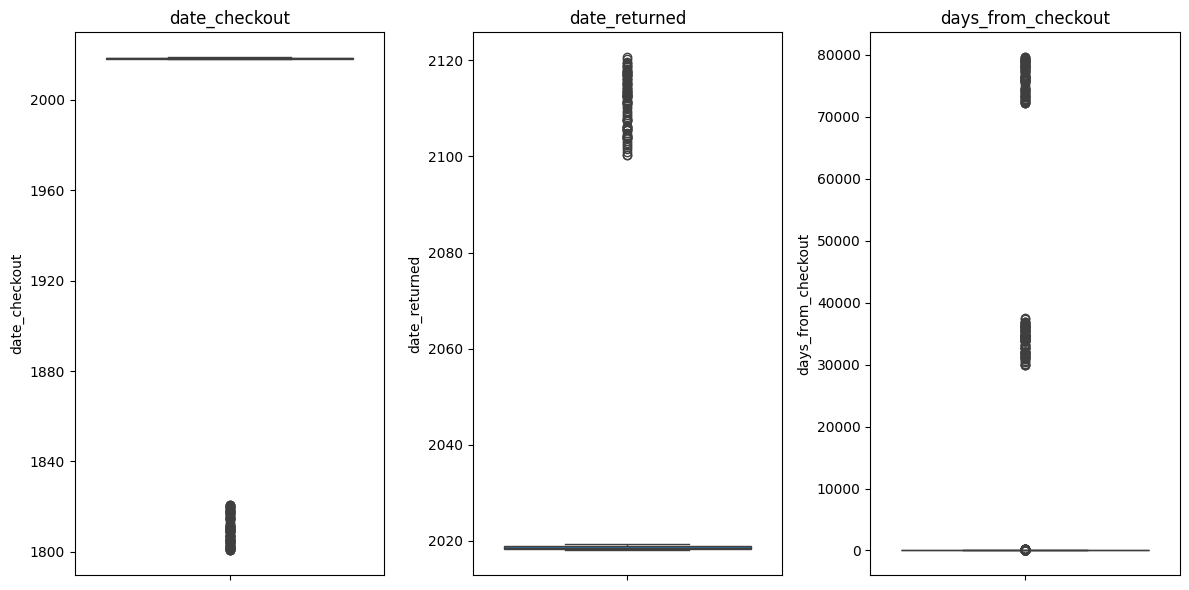

In [618]:
# Checking outliers for date_checout and date_returned
# Define the columns to plot
columns = ['date_checkout', 'date_returned', 'days_from_checkout']

# Create subplots
plt.figure(figsize=(12, 6))  # Adjusting the size as needed

for i, col in enumerate(columns):   # for loop to iterate columns
    plt.subplot(1, len(columns), i + 1) # lays out the boxplot side by side
    sns.boxplot(y=df_check[col])  # y axis will be the columns
    plt.title(col) # title will be the name of column

plt.tight_layout()
plt.show()

**Observations of outliers plot:**

1. Date_checkout: most of dates are above year 2000 as y axis represents the year. And, few are below 1840 year which cannot be correct and treated as an outlier. Hence, I will remove the columns with date below the year 2000

2. Date_returned: We can see few dates are above year 2080 which is invalid and we will remove those columns as well

3. Days_from_checkout: As we can see, we have uneven days from checkout above 50000 days, after cleaning date_checkout and date_return, we will see if days_from_checkout have no more outliers

In [619]:
# Creating new df_check having date_checkout above the date '2000-01-01'
df_check = df_check[df_check['date_checkout']> '2000-01-01'].reset_index(drop=True)

In [620]:
# Assigining the df_check having date_returned below year '2025-07-01'
df_check = df_check[df_check['date_returned']< '2025-07-01'].reset_index(drop=True)

In [621]:
# Checking for description of df_check
df_check.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,1451,240,CW-7tHAaVR0C,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patron_id,1451,1451,ac0bb7b22b4df999a0b1216ded727f8e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
library_id,1451,18,223-222@5xc-jxr-tgk,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_checkout,1451,NaN,NaN,NaN,2018-06-27 23:06:24.562370816,2018-01-01 00:00:00,2018-03-28 12:00:00,2018-06-26 00:00:00,2018-09-26 12:00:00,2018-12-31 00:00:00,NaN
date_returned,1451,NaN,NaN,NaN,2018-07-22 01:55:07.236388608,2018-01-08 00:00:00,2018-04-18 00:00:00,2018-07-20 00:00:00,2018-10-22 00:00:00,2019-05-21 00:00:00,NaN
days_from_checkout,1451.0,NaN,NaN,NaN,24.117161,5.0,11.0,17.0,23.0,179.0,29.847683


**We have all date_checkout and date_returned normalized**

**Action performed for checkout data to clean and filter:**

1. Changed data types of date_checkout and date_returned to datetime dtype
2. Fixed the uneven dates from both columns to convert into date time object
3. Calculated new column where we can see number of days from checkout which is substracting date_returned and date_checkout
4. Some days calculation were negative due to bad ordering of date_checkout and date_returned
5. I have dropped those columns and created new dataframe called df_check() for the checkout dataset with all positive days_from_checkout column values
6. According to the outlier map, I have dropped the date_checkout which are below 2000 year and date_returned which are above current year

In [622]:
# Adding new column of late returns where if days_from_checout is more than 28 days, it will be considered as late_return
df_check['late_return'] = np.where(df_check['days_from_checkout']>28, 1, 0) # np.where applies conditional logic, if more than 28 days then 1 else 0

In [623]:
# checking formation of late_return column
df_check.head()

,id,patron_id,library_id,date_checkout,date_returned,days_from_checkout,late_return
0,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14,0
1,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62,1
2,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100,1
3,CW-7tHAaVR0C,dd9f34e9d65126a2b02003d8ac60aaa4,22c-222@5xc-jwj-pvz,2018-01-10,2018-02-04,25,0
4,t1e3BWziAc8C,3b85b2c7b424618f533329018e9a11d5,222-222@5xc-jv5-nt9,2018-06-23,2018-07-14,21,0


In [624]:
# Checking the count of late_returns
df_check['late_return'].value_counts()

,count
late_return,
0,1319
1,132


**Observations: Total 1319 books were returned on time and 132 were late returned from date of checkout**

**Final df_check conating following columns:**

*   id: checkout id
*   patron_id: user id who checked out
*   Library_id: library from where check out was made
*   date_checkout: date of the check out
*   date_returned: return of the book date

**Newly added columns:**
*   days_from_checkout: total days from checkout to return of book
*   late_return: if days_from_checkout is more than 28 days which marks late return and specified as 1 else 0 for timely returns


# Exploratory Data Analysis of customer dataset:

In [625]:
# checking shape of dataset
df_cust.shape

(2000, 10)

In [626]:
# Checking first five rows of customer dataset
df_cust.head()

,id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 NE Meikle Pl,Portland,Oregon,97213.0,2009-09-10,female,High School,NaN
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 SE Harrison St,Portland,Oregon,97215.0,1956-12-15,female,College,Blue Collar
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 SE Pine St,Portland,Oregon,97214.0,1960-12-18,male,College,Education & Health
3,f0d9ce833ddc1f73c1e0b55bdebf012e,Charles Baker,12271 N Westshore Dr,Portland,Oregon,97217.0,2105-07-19,male,Graduate Degree,SALES
4,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 NE Skyport Way,NaN,Oregon,97218.0,1961-03-14,male,Graduate Degree,Blue Collar


In [627]:
# Checking last five rows of customer dataset
df_cust.tail()

,id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation
1995,ae55f0b71b8b8e91945cd9a91b6e45ee,JOE Roberts,7331 NE Killingsworth St,Portland,NaN,97218.0,1955-05-23,male,Others,Business & Finance
1996,07fe407cc889ea21a8bdc04c305960b1,Matthew Coniglio,1908 NW Harborside Dr,Vancouver,washington,98660.0,1975-11-10,male,Others,Business & Finance
1997,9a2194fcd4f0f326f0ca334450e16a93,Earl Grier,22 NE graham ST,Portland,OREGON,97212.0,2007-10-02,male,Others,Education & Health
1998,01a598a05c48fdd18461d6411f51a109,Rogelio Richmann,7000 NE Airport Way,Portland,OREGON,97218.0,2001-02-19,male,College,Business & Finance
1999,2d1d65505400e568a045c828c9ebe365,Paul Groat,8993 SE 78th Pl,Portland,Oregon,97206.0,NaN,male,Others,Sales


In [628]:
# Checking info of dataset
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2000 non-null   object
 1   name            2000 non-null   object
 2   street_address  2000 non-null   object
 3   city            1906 non-null   object
 4   state           1898 non-null   object
 5   zipcode         1999 non-null   object
 6   birth_date      1893 non-null   object
 7   gender          1899 non-null   object
 8   education       1896 non-null   object
 9   occupation      1893 non-null   object
dtypes: object(10)
memory usage: 156.4+ KB


In [629]:
# Checking description of dataset
df_cust.describe(include='all').T

,count,unique,top,freq
id,2000,2000,bd00c3893667d66c5906609c13e1e807,1
name,2000,1996,James Williams,3
street_address,2000,1915,7000 NE Airport Way,20
city,1906,32,Portland,1590
state,1898,9,Oregon,1663
zipcode,1999,194,97217.0,169
birth_date,1893,1830,1972-06-02,3
gender,1899,8,male,877
education,1896,39,High School,461
occupation,1893,73,Admin & Support,276


In [630]:
# Checking nulls
df_cust.isnull().sum()

,0
id,0
name,0
street_address,0
city,94
state,102
zipcode,1
birth_date,107
gender,101
education,104
occupation,107


In [631]:
# Checking duplicates
df_cust.duplicated().sum()

np.int64(0)

**Data Cleaning Steps:**

1. As we can see, from the EDA, few cities and State are missing. We will not fix it as it will not be much needed for our further analysis but we will normalize all stated city and state in capital

2. Converting zipcode dtype into numeric dtype

3. Cleaning and converting birth-date into datetime format as well as we can see few are above the current year which is invalid and will fix it

4. Will convert gender, occupation and education in to capital letters for normalization

**Data Cleaning for customers dataset:**

In [632]:
# checking unique cities
df_cust['city'].unique()

array(['Portland ', ' Portland', 'Portland', nan, 'Happy Valley',
       'Lake Oswego', 'Vancouver', 'Beaverton', 'PORTLAND', 'Gresham',
       'West Linn', 'Vancouver ', 'Tualatin', 'Oregon City', 'Damascus',
       'portland', 'Clackamas', ' Vancouver', 'Hillsboro', 'Lake  Oswego',
       'Lake OSWEGO', 'Happy  Valley', 'Lake   Oswego', 'VANCOUVER',
       'vancouver', 'Gladstone', 'BEAVERTON', 'HAPPY Valley', 'CLACKAMAS',
       'LAKE OSWEGO', 'Happy  Valley ', ' Beaverton', 'Happy Valley '],
      dtype=object)

In [633]:
# Checking unique state
df_cust['state'].unique()

array(['Oregon', 'OREGON', 'Washington', nan, 'Oregon ', ' Oregon',
       ' Washington', 'oregon', 'Washington ', 'washington'], dtype=object)

**Assumptions made on Reference from Google Maps/Google Search for Address**

Assinging the cities with particular state

*   Portland - Oregon
*   Vancouver - Washington
*   Happy Valley - Oregon
*   Lake Oswego - Oregon
*   Beaverton - Oregon
*   Gresham - Oregon
*   West Linn - Oregon
*   Tualatin - Oregon
*   Oregon City - Oregon
*   Damascus - Oregon
*   Clackamas - Oregon
*   Hillsboro - Oregon
*   Gladstone - Oregon

We just have Vancouver which is based in Washington and rest of all in Oregon

In [634]:
# Capitalizing city and state of dataset
df_cust['city'] = df_cust['city'].astype(str).apply(lambda x: x.upper())
df_cust['state'] = df_cust['state'].astype(str).apply(lambda x: x.upper())

In [635]:
# checking dataset for identifying the change
df_cust.head()

,id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 NE Meikle Pl,PORTLAND,OREGON,97213.0,2009-09-10,female,High School,NaN
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 SE Harrison St,PORTLAND,OREGON,97215.0,1956-12-15,female,College,Blue Collar
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 SE Pine St,PORTLAND,OREGON,97214.0,1960-12-18,male,College,Education & Health
3,f0d9ce833ddc1f73c1e0b55bdebf012e,Charles Baker,12271 N Westshore Dr,PORTLAND,OREGON,97217.0,2105-07-19,male,Graduate Degree,SALES
4,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 NE Skyport Way,NAN,OREGON,97218.0,1961-03-14,male,Graduate Degree,Blue Collar


In [636]:
# Now, we will convert zipcode into numeric data type
# Parse to a proper integer (drops .0 but keeps the value)
df_cust['zipcode'] = pd.to_numeric(df_cust['zipcode'], errors='coerce').astype('Int64')

In [637]:
# Checking the execution of previous code
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2000 non-null   object
 1   name            2000 non-null   object
 2   street_address  2000 non-null   object
 3   city            2000 non-null   object
 4   state           2000 non-null   object
 5   zipcode         1878 non-null   Int64 
 6   birth_date      1893 non-null   object
 7   gender          1899 non-null   object
 8   education       1896 non-null   object
 9   occupation      1893 non-null   object
dtypes: Int64(1), object(9)
memory usage: 158.3+ KB


In [638]:
# converting birth_date column into datetime
df_cust['birth_date'] = pd.to_datetime(df_cust['birth_date'], errors='coerce') # coerce will convert invalid datetime formate if present into nan

In [639]:
# checking nan in birthdate column
df_cust['birth_date'].isnull().sum()

np.int64(107)

**Null count of birthdate 107 matches the actuall null count so we have almost fixed all birthdate. We saw that few birthdates are invalid but we will not fix it hence customer id is more important for further analysis so we will not drop invalid birthdates column.**

In [640]:
# checking dtype of all columns
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              2000 non-null   object        
 1   name            2000 non-null   object        
 2   street_address  2000 non-null   object        
 3   city            2000 non-null   object        
 4   state           2000 non-null   object        
 5   zipcode         1878 non-null   Int64         
 6   birth_date      1893 non-null   datetime64[ns]
 7   gender          1899 non-null   object        
 8   education       1896 non-null   object        
 9   occupation      1893 non-null   object        
dtypes: Int64(1), datetime64[ns](1), object(8)
memory usage: 158.3+ KB


**Outlier Detection:**

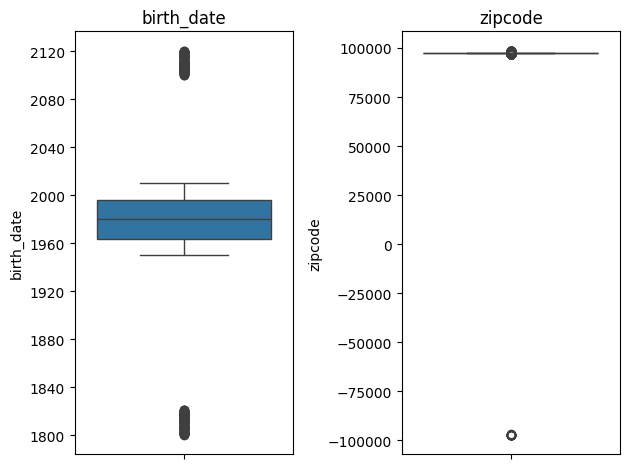

In [641]:
# checking outliers for birth_date and zipcode column
columns = ['birth_date', 'zipcode']
for i, col in enumerate(columns):
  plt.subplot(1, len(columns), i + 1)
  sns.boxplot(y=df_cust[col])
  plt.title(col)
  plt.tight_layout()
plt.show()

In [642]:
# Creating new dataset with birthdate above 1920 year and below 2025
df_cust_new = df_cust[df_cust['birth_date']> '1920-01-01'].reset_index(drop=True)
df_cust_new = df_cust_new[df_cust_new['birth_date']< '2025-07-01'].reset_index(drop=True)

In [643]:
# Checking description of df_cust_new
df_cust_new.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,1707,1707,01a598a05c48fdd18461d6411f51a109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,1707,1703,James Williams,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street_address,1707,1637,7000 NE Airport Way,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1707,23,PORTLAND,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,1707,7,OREGON,1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipcode,1607.0,<NA>,<NA>,<NA>,95067.345364,-97266.0,97207.5,97217.0,97222.0,98685.0,20473.803572
birth_date,1707,NaN,NaN,NaN,1980-01-12 21:13:48.822495616,1950-01-03 00:00:00,1965-04-25 00:00:00,1979-11-01 00:00:00,1994-07-28 00:00:00,2009-12-24 00:00:00,NaN
gender,1623,8,female,745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1615,35,High School,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,1616,65,Admin & Support,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**As we saw from outliers, we have birthdate below 1920 year and above 2025 which was invalid, so dropped the rows with invalid birthdates and now we have total 1707 rows in this cleaned dataset = df_cust_new**

In [644]:
# capitalizing gender, occupation and education of the dataset to normalize
df_cust_new['occupation'] = df_cust_new['occupation'].astype(str).str.replace(r'\s+', '', regex=True).str.upper() # replacing any uneven white spacing or character
df_cust_new['education'] = df_cust_new['education'].astype(str).str.replace(r'\s+', '', regex=True).str.upper()
df_cust_new['gender'] = df_cust_new['gender'].astype(str).str.replace(r'\s+', '', regex=True).str.upper()

**We will add age column to identify age of the customer from birthdate:**

In [645]:
# adding new column 'age' of current age of the customer to the dataset
df_cust_new['age'] = ((pd.Timestamp.today() - df_cust_new['birth_date']).dt.days / 365.25).astype(int) # timestamp identify current date and dt.days converts birth_date into days from current days which is divided by 365 to form age (int)

In [646]:
# checking execution of previous code
df_cust_new.head()

,id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation,age
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 NE Meikle Pl,PORTLAND,OREGON,97213,2009-09-10,FEMALE,HIGHSCHOOL,NAN,15
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 SE Harrison St,PORTLAND,OREGON,97215,1956-12-15,FEMALE,COLLEGE,BLUECOLLAR,68
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 SE Pine St,PORTLAND,OREGON,97214,1960-12-18,MALE,COLLEGE,EDUCATION&HEALTH,64
3,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 NE Skyport Way,NAN,OREGON,97218,1961-03-14,MALE,GRADUATEDEGREE,BLUECOLLAR,64
4,8380f7f05a183e9b17f133d5e8a78707,Katherine Bax,4106 NE 69th Ave,PORTLAND,OREGON,97218,1990-10-06,FEMALE,GRADUATEDEGREE,TECH,34


**Final df_cust_new has following columns:**

*   id: user id
*   name: name of the customer/user
*   street_address: address of the customer
*   city: city from which customer belongs
*   state: state from which customer belongs
*   zipcode: postal code of address of customer
*   birth_date: date of the birth of customer
*   gender: gender of customer
*   education: education of the customer
*   Occupation: customers' occupation


**Newly added columns:**
*   Age: age of the customer since birth_date


# Exploratory Data Analysis of books.csv

In [647]:
# checking shape of books dataset
df_books.shape

(240, 8)

In [648]:
# checking first ten rows of dataset
df_books.head(10)

,id,title,authors,publisher,publishedDate,categories,price,pages
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,['United States. Bureau of Foreign and Domesti...,NaN,1913,['Advertising'],469.99,654
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"['John A. Howard', 'James Hulbert']",NaN,1973,['Advertising'],372.0,784
3,A-HthMfF5moC,Profitable Advertising,NaN,NaN,1894,['Advertising'],240.99USD,559
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,['United States. Federal Trade Commission'],NaN,1944,['Government publications'],539.0,757
5,K5SYITH0vRIC,Advertising of Alcoholic Beverages. H.R. 4627,['United States. Congress. House. Committee on...,NaN,1956,NaN,484.5,682
6,TH8SSrWcVQ4C,Advertising Your Small Business,NaN,NaN,1984,['Advertising'],400.99,635
7,ZjZOAAAAMAAJ,Library of Advertising,['Axel Petrus Johnson'],NaN,1911,['Advertising'],*35.99,428
8,uFy7zQEACAAJ,Advertising,['Roderick White'],NaN,1980,['Advertising'],438.5,569
9,mR9eAgAAQBAJ,Negative Political Advertising,"['Karen S. Johnson-Cartee', 'Gary Copeland']",Routledge,2013-12-16,['Business & Economics'],311.99,640


In [649]:
# Checking last ten rows of dataset
df_books.tail(10)

,id,title,authors,publisher,publishedDate,categories,price,pages
230,BhQSAQAAMAAJ,Annual Resources Report,NaN,NaN,1995,['Mines and mineral resources'],253.99,424
231,CW-7tHAaVR0C,Geostatistics for Natural Resources Evaluation,"['Pierre Goovaerts', 'Department of Civil and ...",Oxford University Press on Demand,1997,['Science'],414.5,561
232,h9QcAQAAMAAJ,"Industrial Resources, Kentucky: Radcliff & Vin...",NaN,NaN,1974,['Kentucky'],315.99,504^
233,ck-32n6REQgC,The John H. Chafee Coastal Barrier Resources S...,['United States. Congress. House. Committee on...,NaN,2004,['Barrier islands'],154.99,442
234,WXssAAAAYAAJ,Reports Submitted to the Council on Library Re...,"['Bolt, Beranek, and Newman, inc']",NaN,1963,['Information storage and retrieval systems'],390.99,614
235,W58mAQAAIAAJ,Political and Commercial Control of the Minera...,['United States. Dept. of the Interior'],NaN,1918,NaN,153.0,503
236,frzDCQAAQBAJ,Water Resources Management IV,"['C.A. Brebbia', 'A. Kungolos']",WIT Press,2007-05-08,['Nature'],563.5,780
237,mQTxAAAAMAAJ,"Department Publications - State of California,...",['California. Dept. of Water Resources'],NaN,1995,['Hydrology'],216.5|,748
238,lMkmAQAAMAAJ,Technical Report - South Carolina Marine Resou...,['South Carolina. Marine Resources Division'],NaN,1979,['Marine resources'],11.5,236
239,jPs8AAAAYAAJ,Water Resources Activities in the United States,['U.S. Congress. Senate. Select Committee on N...,NaN,1960,['Water resources development'],94.5,544


In [650]:
# Checking info of dataset
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             240 non-null    object
 1   title          240 non-null    object
 2   authors        173 non-null    object
 3   publisher      94 non-null     object
 4   publishedDate  238 non-null    object
 5   categories     201 non-null    object
 6   price          238 non-null    object
 7   pages          240 non-null    object
dtypes: object(8)
memory usage: 15.1+ KB


In [651]:
# Checking description of dataset
df_books.describe(include='all').T

,count,unique,top,freq
id,240,240,hVFwAAAAQBAJ,1
title,240,220,Popular Mechanics,12
authors,173,171,['Khan'],2
publisher,94,64,Tata McGraw-Hill Education,6
publishedDate,238,171,2004,8
categories,201,87,['Business & Economics'],26
price,238,223,400.99,2
pages,240,203,635,3


**Data Cleaning Steps:**

1. Assuming that Published date has maximum years in it, so we will convert it into year of datetime object
2. We will convert price into float object omitting uneven format
3. Convert pages into even integer object

**Data Cleaning of books dataset:**

In [652]:
# Converting published date into datetime object and mentioning just years
df_books['publishedYear'] = (
    df_books['publishedDate']
      .astype(str)                 # make sure everything is a string
      .str.extract(r'(\d{4})')[0]  # grab the first 4-digit block
      .astype('Int64')               # or .astype('Int64') for nullable ints
)

In [653]:
# Checking the execution by info()
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             240 non-null    object
 1   title          240 non-null    object
 2   authors        173 non-null    object
 3   publisher      94 non-null     object
 4   publishedDate  238 non-null    object
 5   categories     201 non-null    object
 6   price          238 non-null    object
 7   pages          240 non-null    object
 8   publishedYear  238 non-null    Int64 
dtypes: Int64(1), object(8)
memory usage: 17.2+ KB


In [654]:
df_books.head()

,id,title,authors,publisher,publishedDate,categories,price,pages,publishedYear
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320,2013
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,['United States. Bureau of Foreign and Domesti...,NaN,1913,['Advertising'],469.99,654,1913
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"['John A. Howard', 'James Hulbert']",NaN,1973,['Advertising'],372.0,784,1973
3,A-HthMfF5moC,Profitable Advertising,NaN,NaN,1894,['Advertising'],240.99USD,559,1894
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,['United States. Federal Trade Commission'],NaN,1944,['Government publications'],539.0,757,1944


In [655]:
# Fixing price column, it suppose to appear numbers
df_books['price'] = df_books['price'].astype(str).str.extract(r'([\d\.]+)')[0].astype(float)

In [656]:
# checking the execution of previous code
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             240 non-null    object 
 1   title          240 non-null    object 
 2   authors        173 non-null    object 
 3   publisher      94 non-null     object 
 4   publishedDate  238 non-null    object 
 5   categories     201 non-null    object 
 6   price          238 non-null    float64
 7   pages          240 non-null    object 
 8   publishedYear  238 non-null    Int64  
dtypes: Int64(1), float64(1), object(7)
memory usage: 17.2+ KB


In [657]:
# Fixing pages such as only number should be appearing
df_books['pages'] = df_books['pages'].astype(str).str.extract(r'([\d\.]+)')[0].astype(int) # making sure each row is treated as string and from that string extracting actual digit

In [658]:
# Checking the execution of previous code
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             240 non-null    object 
 1   title          240 non-null    object 
 2   authors        173 non-null    object 
 3   publisher      94 non-null     object 
 4   publishedDate  238 non-null    object 
 5   categories     201 non-null    object 
 6   price          238 non-null    float64
 7   pages          240 non-null    int64  
 8   publishedYear  238 non-null    Int64  
dtypes: Int64(1), float64(1), int64(1), object(6)
memory usage: 17.2+ KB


In [659]:
# Checking first 10 rows of dataset
df_books.head(10)

,id,title,authors,publisher,publishedDate,categories,price,pages,publishedYear
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320,2013
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,['United States. Bureau of Foreign and Domesti...,NaN,1913,['Advertising'],469.99,654,1913
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"['John A. Howard', 'James Hulbert']",NaN,1973,['Advertising'],372.00,784,1973
3,A-HthMfF5moC,Profitable Advertising,NaN,NaN,1894,['Advertising'],240.99,559,1894
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,['United States. Federal Trade Commission'],NaN,1944,['Government publications'],539.00,757,1944
5,K5SYITH0vRIC,Advertising of Alcoholic Beverages. H.R. 4627,['United States. Congress. House. Committee on...,NaN,1956,NaN,484.50,682,1956
6,TH8SSrWcVQ4C,Advertising Your Small Business,NaN,NaN,1984,['Advertising'],400.99,635,1984
7,ZjZOAAAAMAAJ,Library of Advertising,['Axel Petrus Johnson'],NaN,1911,['Advertising'],35.99,428,1911
8,uFy7zQEACAAJ,Advertising,['Roderick White'],NaN,1980,['Advertising'],438.50,569,1980
9,mR9eAgAAQBAJ,Negative Political Advertising,"['Karen S. Johnson-Cartee', 'Gary Copeland']",Routledge,2013-12-16,['Business & Economics'],311.99,640,2013


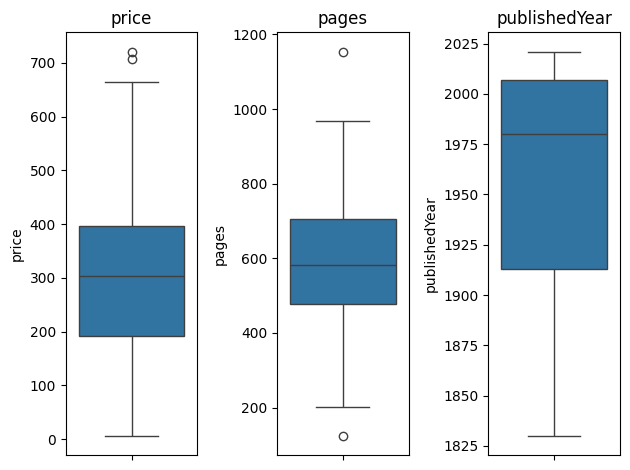

In [660]:
# Checking outliers for price, pages and publishedYear column
columns = ['price', 'pages', 'publishedYear']
for i,col in enumerate(columns):
  plt.subplot(1, len(columns), i+1) # number of rows = 1, columns len = 3, i+1 = each boxplot
  sns.boxplot(y=df_books[col])
  plt.title(col)
  plt.tight_layout()
plt.show()

**Hence, after viewing each outlier plot, there will be no requirement of treating any outlier as all seems to have valid values**

**Final df_books dataset has following columns:**

*   id: book id
*   title: title of the book
*   authors: author of the book
*   publisher: publisher name
*   publishedDate: date of the publication
*   price: price of the book
*   pages: total pages in the book

**Newly added column:**
*   publishedYear: year of the publication of the book

**Now, that we have cleaned df_lib, df_check, df_cust_new and df_books, we will move to multivariate variate analysis where we will find some patterns on late returns via joining the datasets**

# Multivariate Data Analysis:

**Answer to following questions:**

1. Seasonality trends: which month has highest late returns?
2. Which library has highest late returns?
3. Which age or age_group has highest late returns?
4. Find highest late returns among occupation of customers
5. Find highest late returns among customers belong to which education
6. Which gender among customers is related to highest late returns?
7. Which categories of books are highly returned late?
8. Which books highly returned late belongs to which author?
9. What price group of the book has highest late return?
10. Highest late return books contains what number of pages?
11. What is the title of highest late returned book?

**1. Lets check any seasonality trend by adding column of checkout_month to checkout dataset.**

checkout_month columns are months extracted from date_checkout, which tells exactly which month checkout has been made from 12 months.

In [661]:
# adding checkout_month column from date_checkout
df_check['checkout_month'] = df_check['date_checkout'].dt.month
df_check.head()

,id,patron_id,library_id,date_checkout,date_returned,days_from_checkout,late_return,checkout_month
0,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14,0,5
1,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62,1,11
2,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100,1,1
3,CW-7tHAaVR0C,dd9f34e9d65126a2b02003d8ac60aaa4,22c-222@5xc-jwj-pvz,2018-01-10,2018-02-04,25,0,1
4,t1e3BWziAc8C,3b85b2c7b424618f533329018e9a11d5,222-222@5xc-jv5-nt9,2018-06-23,2018-07-14,21,0,6


In [662]:
# grouping by checkout_month with late return rate
df_month_late_returns = df_check.groupby('checkout_month')['late_return'].mean().reset_index()

# sorting values from highest to lowest
df_month_late_returns.sort_values(by='late_return', ascending=False)

,checkout_month,late_return
3,4,0.126126
11,12,0.117188
7,8,0.107438
0,1,0.103704
10,11,0.095652
6,7,0.093750
8,9,0.092593
1,2,0.078947
5,6,0.077519
9,10,0.076923


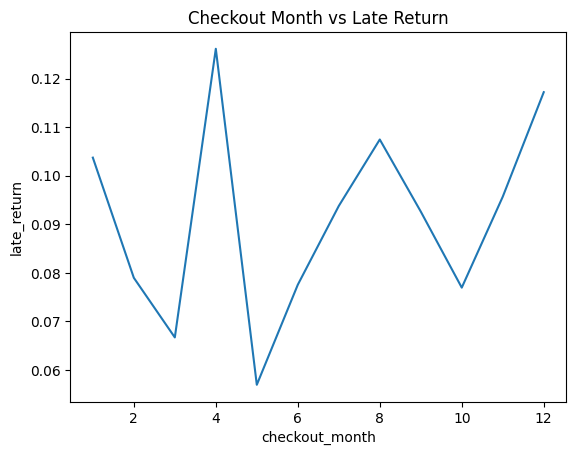

In [663]:
# plotting visuals of months vs late return rate
sns.lineplot(data=df_month_late_returns, x='checkout_month', y='late_return')
plt.title('Checkout Month vs Late Return')
plt.savefig("late_returns_by_month.png", dpi=300, bbox_inches="tight");

**Observations: From 1 to 12 months, 4th month which is April , 8th August and 12th month which is december has highest late return rate. This says customers hang on to books longer while in april due to end of spring break,  and starting of new semester or in August due to fall semester starts or in december due to holiday season and winter break**

**2. Lets check which library has high average late returns by combining df_lib and df_check dataset**

In [664]:
# combining df_lib id with df_check library id
df_lib_check = pd.merge(df_lib, df_check, left_on='id', right_on='library_id')

In [665]:
# checking rows of merged df
df_lib_check.head()

,id_x,name,street_address,city,region,postal_code,id_y,patron_id,library_id,date_checkout,date_returned,days_from_checkout,late_return,checkout_month
0,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,9q1LAQAAIAAJ,f8a72c6a5966f96150da7214377691d1,226-222@5xc-kc4-fpv,2018-02-19,2018-02-27,8,0,2
1,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,OK_0vJSsRKkC,8157486477c82af241ed11766e4cc7ef,226-222@5xc-kc4-fpv,2018-11-11,2018-11-22,11,0,11
2,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,dXbSBQAAQBAJ,05f1f6892298da1462dd51311c1ed5ed,226-222@5xc-kc4-fpv,2018-10-28,2018-11-22,25,0,10
3,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,tCFxM82-w10C,242554ebeefe686dbfd6c732fdd2a4ed,226-222@5xc-kc4-fpv,2018-07-15,2018-07-29,14,0,7
4,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,hCVACwAAQBAJ,1f69c589b4a35094102a63eec775d176,226-222@5xc-kc4-fpv,2018-06-29,2018-07-23,24,0,6


**Note: id_x is library id and id_y is checkout id**

In [666]:
# shape of merge df
df_lib_check.shape

(1451, 14)

In [667]:
# lets group by library name with street to see average late return and sort by highest to smallest later return
df_lib_late_returns = df_lib_check.groupby(['name', 'street_address'])['late_return'].mean().reset_index()

# sorting values from highest to smallest
df_lib_late_returns.sort_values(by='late_return', ascending=False)

,name,street_address,late_return
7,MULTNOMAH COUNTY LIBRARY,205 NE Russell St,0.130435
1,MULTNOMAH COUNTY LIBRARY HOLLYWOOD LIBRARY,4040 NE Tillamook St,0.125000
10,MULTNOMAH COUNTY LIBRARY,216 ne Knott st,0.119048
8,MULTNOMAH COUNTY LIBRARY ALBINA,3605 NE 15th Ave,0.117647
15,MULTNOMAH COUNTY LIBRARY NORTHWEST,2300 NW Thurman St,0.112676
17,MULTNOMAH COUNTY LIBRARY WOODSTOCK,6008 se 49TH AVE,0.098901
9,MULTNOMAH COUNTY LIBRARY CENTRAL,801 SW 10th Ave,0.095238
16,MULTNOMAH COUNTY LIBRARY ST JOHNS,7510 N Charleston Ave,0.095238
3,FRIENDS OF THE MULTNOMAH COUNTY LIBRARY,522 SW 5th Ave,0.094595
12,MULTNOMAH COUNTY LIBRARY HOLGATE,7905 SE Holgate Blvd,0.090909


**Observations:**

Multnomah County Library at 205 NE Russell St in Portland, Oregon has highest late return rate of 13.04% comparatively among all libraries in that region

**3. Which age group has highest average late return? Combining checkout and customer dataset**

In [668]:
# merging checkout and customer dataset
df_cust_check = pd.merge(df_cust_new, df_check, left_on='id', right_on='patron_id')

In [669]:
# checking rows of merged df
df_cust_check.head()

,id_x,name,street_address,city,state,zipcode,birth_date,gender,education,occupation,age,id_y,patron_id,library_id,date_checkout,date_returned,days_from_checkout,late_return,checkout_month
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 NE Meikle Pl,PORTLAND,OREGON,97213,2009-09-10,FEMALE,HIGHSCHOOL,NAN,15,QT21QytTCiUC,df83ec2d0d409395c0d8c2690cfa8b67,222-222@5xc-jxp-rp9,2018-08-01,2018-08-22,21,0,8
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 SE Harrison St,PORTLAND,OREGON,97215,1956-12-15,FEMALE,COLLEGE,BLUECOLLAR,68,FRgQAAAAIAAJ,6aec7ab2ea0d67161dac39e5dcabd857,zzw-222@5xc-knn-c5z,2018-06-25,2018-07-19,24,0,6
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 SE Pine St,PORTLAND,OREGON,97214,1960-12-18,MALE,COLLEGE,EDUCATION&HEALTH,64,xtY2AAAAMAAJ,0c54340672f510fdb9d2f30595c1ab53,222-222@5xc-jxp-rp9,2018-08-05,2018-08-11,6,0,8
3,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 NE Skyport Way,NAN,OREGON,97218,1961-03-14,MALE,GRADUATEDEGREE,BLUECOLLAR,64,TUAyAQAAMAAJ,3720379163f6b46944db6c98c0485bfd,22c-222@5xc-jwj-pvz,2018-11-21,2018-12-11,20,0,11
4,8380f7f05a183e9b17f133d5e8a78707,Katherine Bax,4106 NE 69th Ave,PORTLAND,OREGON,97218,1990-10-06,FEMALE,GRADUATEDEGREE,TECH,34,HUX-y4oXl04C,8380f7f05a183e9b17f133d5e8a78707,226-222@5xc-jxj-7yv,2018-08-19,2018-08-24,5,0,8


**Note: id_x is customer id in this merged df and id_y is checkout id**

In [670]:
# checking shape of the dataset
df_cust_check.shape

(1243, 19)

In [671]:
# Define numeric bin edges
bins = [0, 18, 30, 40, 50, 65, 80, 100] # edges of the age

# Define labels for each bin
labels = ['0–18', '19–30', '31–40', '41–50', '51–65', '66-80', '80-100'] # name of the group, the right edge of the bin is included (e.g. age=30 goes in '19–30')

# Apply pd.cut
df_cust_check['age_group'] = pd.cut(df_cust_check['age'], bins=bins, labels=labels, right=True) # pd.cut splits numeric data into bins and labels

In [672]:
# group by age_group with late return rate
df_age_late_returns = df_cust_check.groupby('age_group')['late_return'].mean().reset_index()

# sorting values from highest to smallest
df_age_late_returns.sort_values(by='late_return', ascending=False)

,age_group,late_return
4,51–65,0.111455
2,31–40,0.102222
5,66-80,0.095238
0,0–18,0.093333
1,19–30,0.083682
3,41–50,0.072917
6,80-100,NaN


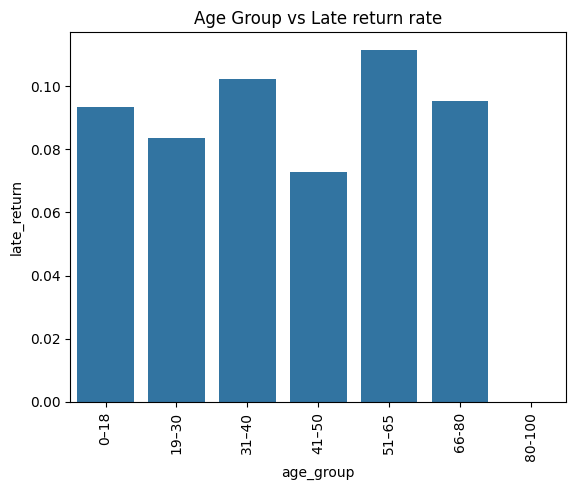

In [673]:
# plotting barplot for visually representing the age_group vs late return rate
sns.barplot(data=df_age_late_returns, x='age_group', y='late_return')
plt.xticks(rotation=90)
plt.title('Age Group vs Late return rate');

**Observations: The age group between 51-65 are more prone to returning books late and no customers are over age 80**

**4. Which occupation type of customers are more prone to late_return?**

In [674]:
# grouping by education and late_return rate
df_occ_late_returns = df_cust_check.groupby('occupation')['late_return'].mean().reset_index()

# sorting values from largest to smallest
df_occ_late_returns.sort_values(by='late_return', ascending=False)

,occupation,late_return
2,BUSINESS&FINANCE,0.116279
7,TECH,0.108434
0,ADMIN&SUPPORT,0.106952
6,SALES,0.093750
3,EDUCATION&HEALTH,0.087719
1,BLUECOLLAR,0.084967
5,OTHERS,0.083333
4,NAN,0.045455


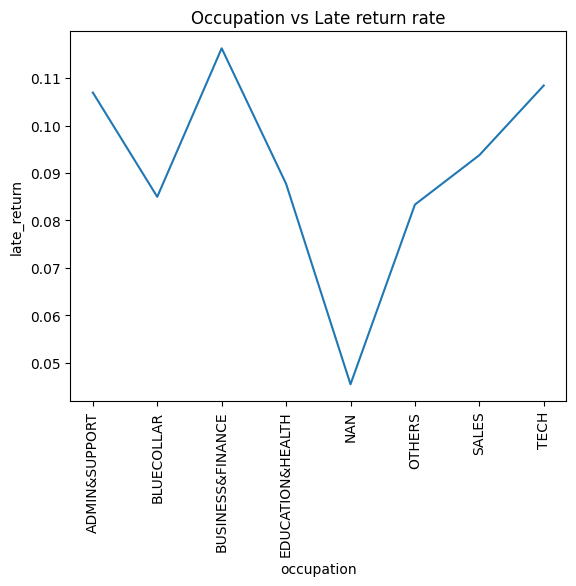

In [675]:
# visualizing graphically occupation vs late_return
sns.lineplot(data=df_occ_late_returns, x='occupation', y='late_return')
plt.xticks(rotation=90)
plt.title('Occupation vs Late return rate');

**Observations: Most of customers who are prone to late returns has occupation in Business and Finance**

**5. Which education type has highest average late returns?**

In [676]:
# grouping education with late return average
df_edu_late_returns = df_cust_check.groupby('education')['late_return'].mean().reset_index()

# sorting values descendingly
df_edu_late_returns.sort_values(by='late_return', ascending=False)

,education,late_return
3,NAN,0.116667
0,COLLEGE,0.105442
4,OTHERS,0.098976
1,GRADUATEDEGREE,0.086142
2,HIGHSCHOOL,0.085106


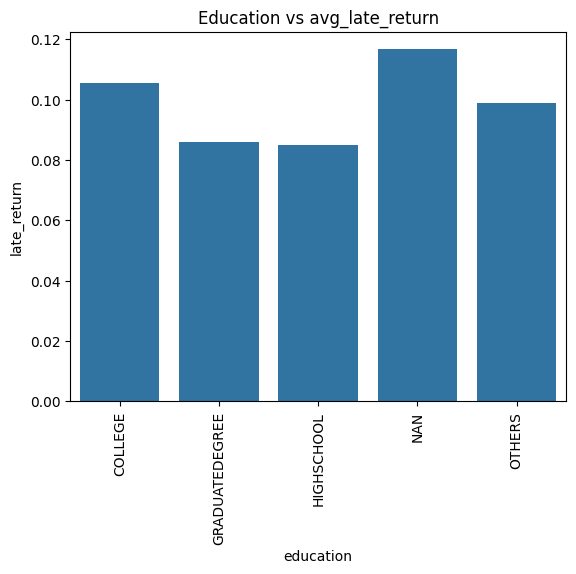

In [677]:
# plotting barplot for education vs late_return
sns.barplot(data=df_edu_late_returns, x='education', y='late_return')
plt.xticks(rotation=90)
plt.title('Education vs avg_late_return');

**Observations: most customers who made late return does not have their education information in the library system and second most late returns made my customers who earn college degree**

**6. Which gender has most late_return average?**

In [678]:
# grouping gender by late_return mean
df_gender_late_returns = df_cust_check.groupby('gender')['late_return'].mean().reset_index()

# sorting values descendingly
df_gender_late_returns.sort_values(by='late_return', ascending=False)

,gender,late_return
1,MALE,0.104907
0,FEMALE,0.090756
2,NAN,0.035088


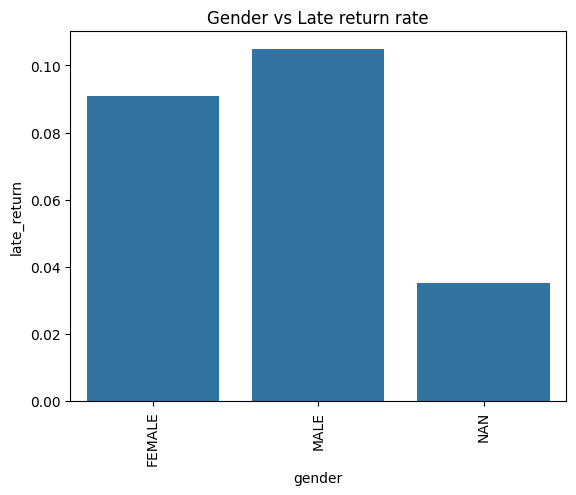

In [679]:
# plotting barplot for gender vs late return
sns.barplot(data=df_gender_late_returns, x='gender', y='late_return')
plt.xticks(rotation=90)
plt.title('Gender vs Late return rate');

**Observations: Mostly Males have returned late**

**7. Which categories of the books are returned late? Combine checkout dataset with books dataset**

In [680]:
# merging checkout dataset with books dataset
df_books_check = pd.merge(df_books, df_check, left_on='id', right_on='id');

In [681]:
# grouping by categories of the books with late return rate
df_books_late_returns = df_books_check.groupby('categories')['late_return'].mean().reset_index()

# sorting values from largest to smallest
df_books_late_return_sorted = df_books_late_returns.sort_values(by='late_return', ascending=False)
df_books_late_return_sorted

,categories,late_return
5,['Agriculture'],0.666667
0,"[""Mechanics' institutes""]",0.500000
29,['Emigration and immigration'],0.500000
84,['Utah'],0.500000
46,['Information storage and retrieval systems'],0.500000
...,...,...
74,['Sand'],0.000000
71,['Physicians'],0.000000
77,['Sports & Recreation'],0.000000
81,['Technology'],0.000000


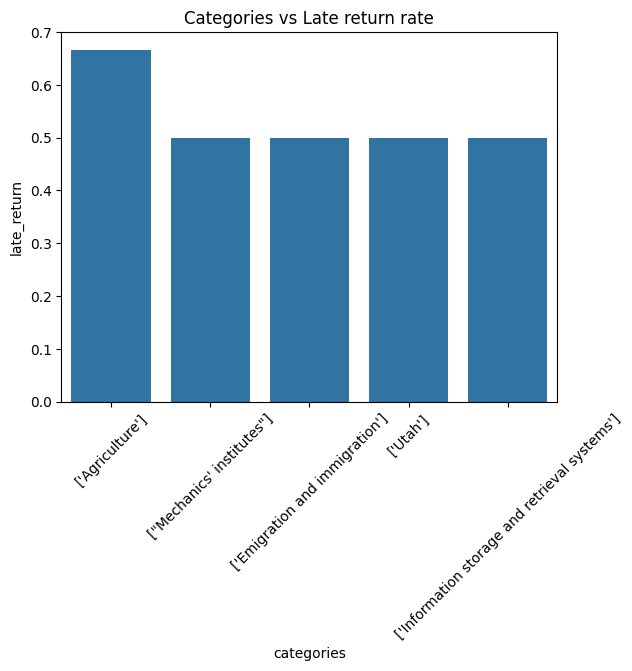

In [682]:
# plotting first five dataset
sns.barplot(data=df_books_late_return_sorted.head(5), x='categories', y='late_return')
plt.xticks(rotation=45)
plt.title('Categories vs Late return rate');

**Observations: Categories related to Agriculture have most late returns**

**8. The books having late returns are mostly of which author?**

In [683]:
# grouping authors and late returns
df_authors_late_returns = df_books_check.groupby('authors')['late_return'].mean().reset_index()

# sorting values from largest to smallest rate
df_authors_late_return_sorted = df_authors_late_returns.sort_values(by='late_return', ascending=False)
df_authors_late_return_sorted

,authors,late_return
80,['Khan & Jain'],1.000000
95,['Montana. Department of Agriculture and Publi...,0.666667
18,"['Bolt, Beranek, and Newman, inc']",0.500000
128,['Siddhartha Mukherjee'],0.500000
169,"['Yoram (Jerry) Wind', 'Catharine Findiesen Ha...",0.500000
...,...,...
164,['William Paine'],0.000000
166,['World Bank'],0.000000
165,"['William WALTON (M.A., of Trinity College, Ca...",0.000000
168,"['Yoon Park', 'Yoon S. Park', 'Musa Essayyad']",0.000000


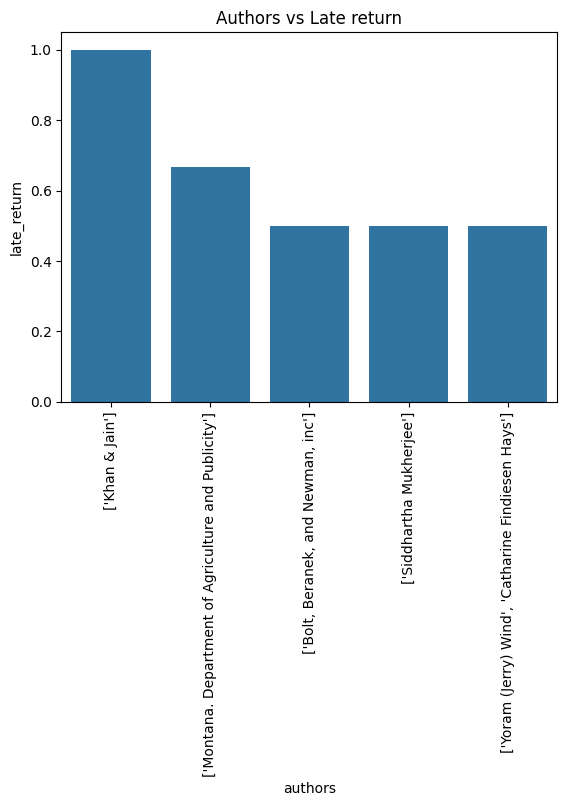

In [684]:
# plotting first five rows of sorted df
sns.barplot(data=df_authors_late_return_sorted.head(5), x='authors', y='late_return')
plt.xticks(rotation=90)
plt.title('Authors vs Late return');

**Observations: Authors 'KHAN & JAIN' & 'Montana. Department of Agriculture --" books has mosy late return rates**

**9. Comparing price of the book with late return rate**

In [685]:
# grouping price with late returns
df_price_late_returns = df_books_check.groupby('price')['late_return'].mean().reset_index()

# sorting values from largest to smallest late returns rate
df_price_late_returns.sort_values(by='late_return', ascending=False)

,price,late_return
54,181.99,1.000000
143,357.00,0.666667
177,426.99,0.600000
68,207.50,0.500000
209,568.99,0.500000
...,...,...
208,565.99,0.000000
212,626.99,0.000000
211,622.50,0.000000
215,648.00,0.000000


In [686]:
# lets break it down into bins and labels to see price group which has most late returns
# Define numeric bin edges
bins = [100, 200, 300, 400, 500, 600, 700, 800, 1000] # edges of the price

# Define labels for each bin
labels = ['0–100', '101–200', '201–300', '301–400', '401–500', '501-600', '601-700', '701-800'] # name of the group, the right edge of the bin is included

# Apply pd.cut
df_books_check['price_group'] = pd.cut(df_books_check['price'], bins=bins, labels=labels, right=True) # pd.cut splits numeric data into bins and labels

In [687]:
# lets group price group with late returns to know which price group are most prone to late returns
df_price_group_late_returns = df_books_check.groupby('price_group')['late_return'].mean().reset_index()

# sorting values from largest to smallest
df_price_group_late_return_sorted = df_price_group_late_returns.sort_values(by='late_return', ascending=False)
df_price_group_late_return_sorted

,price_group,late_return
4,401–500,0.221053
6,601-700,0.200000
3,301–400,0.121693
2,201–300,0.118421
5,501-600,0.115942
1,101–200,0.055016
0,0–100,0.046610
7,701-800,NaN


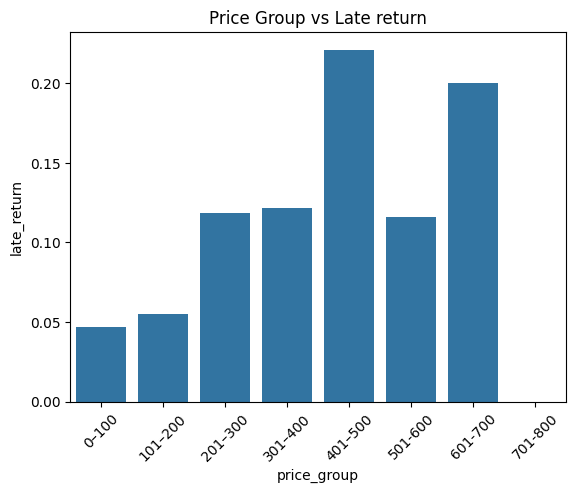

In [688]:
# plotting bar plot
sns.barplot(data=df_price_group_late_return_sorted, x='price_group', y='late_return')
plt.xticks(rotation=45)
plt.title('Price Group vs Late return');

**Observations: Price group of books between 400-500 USD are prone to late returns and no books are over 700$ USD priced**

**10. How many pages books are prone to late returns?**

In [689]:
# lets group by pages with late return rate
df_pages_late_returns = df_books_check.groupby('pages')['late_return'].mean().reset_index()

# sorting values from largest to smallest
df_pages_late_returns.sort_values(by='late_return', ascending=False)

,pages,late_return
157,743,1.000000
175,809,0.666667
187,900,0.600000
129,659,0.600000
153,721,0.500000
...,...,...
183,866,0.000000
180,852,0.000000
185,884,0.000000
188,910,0.000000


In [690]:
# lets check by labelling into bins
# Define numeric bin edges
bins = [300, 500, 700, 900, 1100, 1300, 1500] # edges of the pages

# Define labels for each bin
labels = ['301–500', '501–700', '701–900', '901–1100', '1101-1300', '1301-1500'] # name of the group, the right edge of the bin is included (e.g. pages=500 goes in '301-500')

# Apply pd.cut
df_books_check['page_group'] = pd.cut(df_books_check['pages'], bins=bins, labels=labels, right=True) # pd.cut splits numeric data into bins and labels

In [691]:
# grouping by page_group and late return
df_page_group_late_returns = df_books_check.groupby('page_group')['late_return'].mean().reset_index()

# sorting values from largest to smallest
df_page_group_late_returns.sort_values(by='late_return', ascending=False)

,page_group,late_return
4,1101-1300,0.250000
2,701–900,0.189474
3,901–1100,0.106061
1,501–700,0.095023
0,301–500,0.015152
5,1301-1500,NaN


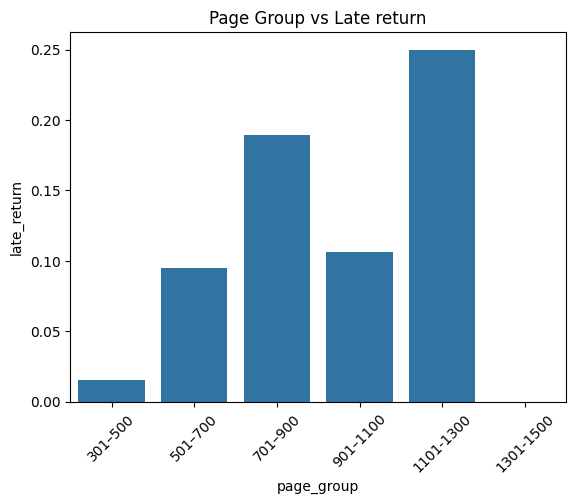

In [692]:
# plotting bar plot
sns.barplot(data=df_page_group_late_returns, x='page_group', y='late_return')
plt.xticks(rotation=45)
plt.title('Page Group vs Late return');

**Observations: books with more pages between 1100 to 1300 are more prone to late returns and no books are over 1300 pages**

**11. What book title has highest late returns?**

In [693]:
# grouping books title with late returns
df_title_late_returns = df_books_check.groupby('title')['late_return'].mean().reset_index()

# sorting highest to lowest
df_title_late_returns_sorted = df_title_late_returns.sort_values(by='late_return', ascending=False)
df_title_late_returns_sorted

,title,late_return
171,Resources and Opportunities of Montana,0.666667
180,The American Journal of Clinical Medicine,0.600000
195,The Journal of Psychological Medicine and Ment...,0.600000
26,American Almanac and Treasury of Facts Statist...,0.500000
196,The Laws of Medicine,0.500000
...,...,...
212,Transient Control of Gasoline Engines,0.000000
214,Water Resources Activities in the United States,0.000000
213,"U.S. Securities, Government Finance, Economic ...",0.000000
217,Water Resources Paper,0.000000


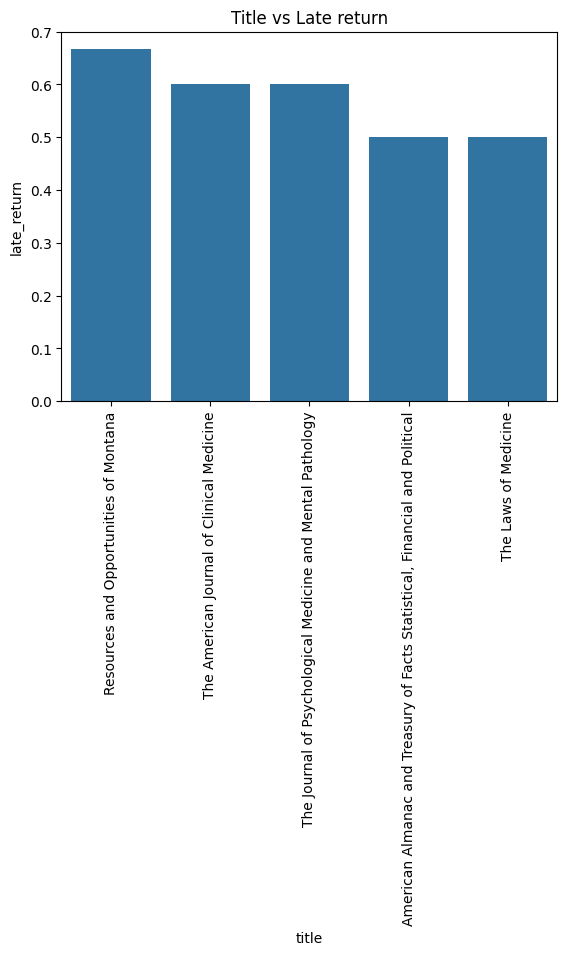

In [694]:
# plotting visuals of title vs late returns
sns.barplot(data=df_title_late_returns_sorted.head(5), x='title', y='late_return')
plt.xticks(rotation=90)
plt.title('Title vs Late return');

**Observations: The title of the book 'Resources and Opportunities of Montana' has highest average late returns**

**Overall Observations from Multivariate Analysis:**

1. 4th, 8th and 12th month of the year which is April, August and December has highest late return rate

2. Multnomah County Library at 205 NE Russell St in Portland, Oregon has highest late return rate of 13.04% comparatively among all libraries in that region

3. The age group between 51-65 are more prone to returning books late and no customers are over age 80

4. Most of customers who are prone to late returns has occupation in Business and Finance

5. Most customers who made late return does not have their education information and second most late returns made my customers who earn college degree

6. Mostly Males have returned late among all genders

7. Categories of the books related to Agriculture have most late returns

8. Authors 'KHAN & JAIN' & 'Montana. Department of Agriculture --" books has mosy late return rates

9. Price group of books between 400-500 USD are prone to late returns and no books are over 700$ USD priced

10. Books with more pages between 1100 to 1300 are more prone to late returns and no books are over 1300 pages

11. The title of the book 'Resources and Opportunities of Montana' has highest average late returns

#  Predictive Analysis: Logistic Regression Model

Logistic regression is a supervised machine learning algorithm used for binary classification problems, where the output variable has only two possible outcomes (e.g., late(1) vs not late(0)).


We will perform logistic regression to predict late book returns, where 0 indicates an on-time return and 1 indicates a late return. First, we will combine all four tables into a single dataset. Then, we will drop columns that are either not needed or may introduce multicollinearity. Once the dataset is finalized for modeling, we will import the necessary libraries and proceed with performing logistic regression. Will split the train and test data with 80:20 ration where 80% of the data will be trained and 20% of the data will be tested for predicting how many checkout books will likely have late returns.


We will measure following matrix for checking how precisely model can predict the results and predicting factors which are prone to late return for future through odds_ratio.


1. Accuracy: overall % of correct prediction

2. Precision: Of all predicted late returns (1), how many were actually late?

3. Recall (Sensitivity): Of all actual late returns, how mnay we actually predict as late.

4. F1-score: Harmonic mean of precision and recall (balances both)

5. Confusion matrix: shows True Positive (how many have model correctly precidicted as 1), True Negative (how many correctly predicted as 0), False Positive (how many falsely predicted as 1 but actually its 0), False Negative(how many falsely predicted as 0 but actually its 1)

6. ROC-AUC curve: gives a measure of how well the binary classification 0 or 1 has been predicted. If its 1 means great predicting model, 0.5 means randomly guessed and less than 0.5 means worst predicting model

7. Odds ratio: odds ratio will show the odds of the feature which likely indicated late return. If odds ratio for any feature is 1 means no effect, greater than 1 means chances of feature being directly correlated with late returns and less than 1 means less likely correlated with late returns

**Merging all dataset into one for model building:**

In [695]:
# merging the dataset to form one table for further predictive analysis
df_1 = pd.merge(df_lib_check, df_cust_new, left_on='patron_id', right_on='id') # merging library and checkout dataset with customers dataset
df_1.head()

,id_x,name_x,street_address_x,city_x,region,postal_code,id_y,patron_id,library_id,date_checkout,...,name_y,street_address_y,city_y,state,zipcode,birth_date,gender,education,occupation,age
0,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,9q1LAQAAIAAJ,f8a72c6a5966f96150da7214377691d1,226-222@5xc-kc4-fpv,2018-02-19,...,THOMAS McDonnell,14230 SW Alpine Crest Way,PORTLAND,OREGON,97224,1987-06-11,MALE,GRADUATEDEGREE,BLUECOLLAR,38
1,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,OK_0vJSsRKkC,8157486477c82af241ed11766e4cc7ef,226-222@5xc-kc4-fpv,2018-11-11,...,Wanda Bravo,8950 SW 69th Ave,PORTLAND,OREGON,97223,1991-07-05,FEMALE,GRADUATEDEGREE,OTHERS,33
2,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,dXbSBQAAQBAJ,05f1f6892298da1462dd51311c1ed5ed,226-222@5xc-kc4-fpv,2018-10-28,...,Kurt Snyder,5130 SW Multnomah Blvd,PORTLAND,OREGON,97219,1980-07-01,MALE,GRADUATEDEGREE,TECH,45
3,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,tCFxM82-w10C,242554ebeefe686dbfd6c732fdd2a4ed,226-222@5xc-kc4-fpv,2018-07-15,...,Jessica Wagner,9700 SW Capitol Hwy,PORTLAND,OREGON,<NA>,1985-12-31,FEMALE,GRADUATEDEGREE,SALES,39
4,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10723 SW capitol Hwy,PORTLAND,OR,97219,hqafM0xZjqIC,58dfc5861569460edcd9b7112864b7bc,226-222@5xc-kc4-fpv,2018-07-06,...,Helen Ingran,3331 Fir Ridge Rd,LAKE OSWEGO,OREGON,97035,1999-06-30,FEMALE,OTHERS,OTHERS,26


**Before merging it with books dataset, we will drop some columns which are unnecessary and might create multicollinearity**

In [696]:
# identifying the columns of the above dataset
df_1.columns

Index(['id_x', 'name_x', 'street_address_x', 'city_x', 'region', 'postal_code',
       'id_y', 'patron_id', 'library_id', 'date_checkout', 'date_returned',
       'days_from_checkout', 'late_return', 'checkout_month', 'id', 'name_y',
       'street_address_y', 'city_y', 'state', 'zipcode', 'birth_date',
       'gender', 'education', 'occupation', 'age'],
      dtype='object')

From the previous columns, we will drop few columns which are not necessary for further analysis

Columns to continue with are: id_x (library_id), name of library, id_y(checkout_book_id), gender(male or female), education of customer, occupation of customer, age, days_from_checkout, late_return, checkout_month

In [697]:
# new dataset by dropping off few columns
df_1_new = df_1.drop(columns=['street_address_x', 'city_x', 'region', 'postal_code', 'patron_id', 'library_id', 'date_checkout', 'date_returned', 'name_y', 'street_address_y', 'city_y', 'state', 'zipcode', 'birth_date'])

In [698]:
# checking new dataset head
df_1_new.head()

,id_x,name_x,id_y,days_from_checkout,late_return,checkout_month,id,gender,education,occupation,age
0,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,9q1LAQAAIAAJ,8,0,2,f8a72c6a5966f96150da7214377691d1,MALE,GRADUATEDEGREE,BLUECOLLAR,38
1,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,OK_0vJSsRKkC,11,0,11,8157486477c82af241ed11766e4cc7ef,FEMALE,GRADUATEDEGREE,OTHERS,33
2,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,dXbSBQAAQBAJ,25,0,10,05f1f6892298da1462dd51311c1ed5ed,MALE,GRADUATEDEGREE,TECH,45
3,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,tCFxM82-w10C,14,0,7,242554ebeefe686dbfd6c732fdd2a4ed,FEMALE,GRADUATEDEGREE,SALES,39
4,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,hqafM0xZjqIC,22,0,7,58dfc5861569460edcd9b7112864b7bc,FEMALE,OTHERS,OTHERS,26


In [699]:
# now we will add books dataset to df_1_new
df_2 = pd.merge(df_1_new, df_books, left_on='id_y', right_on='id', suffixes=('_cust_checkout', '_book')) # suffixes will rename any shared column or duplicated column

In [700]:
# checking new dataset head
df_2.head()

,id_x,name_x,id_y,days_from_checkout,late_return,checkout_month,id_cust_checkout,gender,education,occupation,age,id_book,title,authors,publisher,publishedDate,categories,price,pages,publishedYear
0,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,9q1LAQAAIAAJ,8,0,2,f8a72c6a5966f96150da7214377691d1,MALE,GRADUATEDEGREE,BLUECOLLAR,38,9q1LAQAAIAAJ,Resources and Opportunities of Montana,['Montana. Department of Agriculture and Publi...,NaN,1923,['Agriculture'],357.00,809,1923
1,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,OK_0vJSsRKkC,11,0,11,8157486477c82af241ed11766e4cc7ef,FEMALE,GRADUATEDEGREE,OTHERS,33,OK_0vJSsRKkC,Financial Structure and Economic Development,NaN,World Bank Publications,2000,['Desarrollo economico'],276.00,630,2000
2,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,dXbSBQAAQBAJ,25,0,10,05f1f6892298da1462dd51311c1ed5ed,MALE,GRADUATEDEGREE,TECH,45,dXbSBQAAQBAJ,HTML5 Game Engines,['Dan Nagle'],CRC Press,2014-04-28,['Computers'],150.99,682,2014
3,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,tCFxM82-w10C,14,0,7,242554ebeefe686dbfd6c732fdd2a4ed,FEMALE,GRADUATEDEGREE,SALES,39,tCFxM82-w10C,Social Communication in Advertising,"['William Leiss', 'Stephen Kline', 'Sut Jhally']",Psychology Press,1990,['Business & Economics'],361.99,527,1990
4,226-222@5xc-kc4-fpv,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,hqafM0xZjqIC,22,0,7,58dfc5861569460edcd9b7112864b7bc,FEMALE,OTHERS,OTHERS,26,hqafM0xZjqIC,Advertising the American Dream,['Roland Marchand'],Univ of California Press,1985,['Social Science'],285.99,846,1985


**We will drop off id's columns because it will not required for further prediction**

In [701]:
# now for finalizing the dataset we will remove unnecessary columns
# we will also drop days_from_checkout as it is exact indicator of late_return
df_final = df_2.drop(columns=['id_x', 'id_y', 'id_cust_checkout', 'id_book', 'publishedDate', 'publisher', 'days_from_checkout'])

**We will drop all unwanted ids, publishedDate (because we have publishedYear), publisher and days_from_checkout (because the column is strongly correlated with late_return class)**

In [702]:
#checking head of final dataset
df_final.head()

,name_x,late_return,checkout_month,gender,education,occupation,age,title,authors,categories,price,pages,publishedYear
0,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,0,2,MALE,GRADUATEDEGREE,BLUECOLLAR,38,Resources and Opportunities of Montana,['Montana. Department of Agriculture and Publi...,['Agriculture'],357.00,809,1923
1,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,0,11,FEMALE,GRADUATEDEGREE,OTHERS,33,Financial Structure and Economic Development,NaN,['Desarrollo economico'],276.00,630,2000
2,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,0,10,MALE,GRADUATEDEGREE,TECH,45,HTML5 Game Engines,['Dan Nagle'],['Computers'],150.99,682,2014
3,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,0,7,FEMALE,GRADUATEDEGREE,SALES,39,Social Communication in Advertising,"['William Leiss', 'Stephen Kline', 'Sut Jhally']",['Business & Economics'],361.99,527,1990
4,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,0,7,FEMALE,OTHERS,OTHERS,26,Advertising the American Dream,['Roland Marchand'],['Social Science'],285.99,846,1985


In [703]:
# checking shape of the dataset
df_final.shape

(1243, 13)

In [704]:
# checking description of the dataset
df_final.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name_x,1243,18,MULTNOMAH COUNTY LIBRARY HOLGATE,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
late_return,1243.0,NaN,NaN,NaN,0.094932,0.293238,0.0,0.0,0.0,0.0,1.0
checkout_month,1243.0,NaN,NaN,NaN,6.436042,3.477981,1.0,3.0,6.0,9.0,12.0
gender,1243,3,FEMALE,595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1243,5,HIGHSCHOOL,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,1243,8,ADMIN&SUPPORT,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1243.0,NaN,NaN,NaN,44.959775,17.231118,15.0,30.0,45.0,60.0,75.0
title,1243,219,Popular Mechanics,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
authors,891,170,"['Pierre Goovaerts', 'Department of Civil and ...",13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,1054,87,['Business & Economics'],149,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [705]:
# checking info of the dataset
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_x          1243 non-null   object 
 1   late_return     1243 non-null   int64  
 2   checkout_month  1243 non-null   int32  
 3   gender          1243 non-null   object 
 4   education       1243 non-null   object 
 5   occupation      1243 non-null   object 
 6   age             1243 non-null   int64  
 7   title           1243 non-null   object 
 8   authors         891 non-null    object 
 9   categories      1054 non-null   object 
 10  price           1234 non-null   float64
 11  pages           1243 non-null   int64  
 12  publishedYear   1229 non-null   Int64  
dtypes: Int64(1), float64(1), int32(1), int64(3), object(7)
memory usage: 122.7+ KB


In [706]:
# checking null counts
df_final.isnull().sum()

,0
name_x,0
late_return,0
checkout_month,0
gender,0
education,0
occupation,0
age,0
title,0
authors,352
categories,189


**Now, we have final dataset for further prediction having columns: library name, days_from_checkout, late_return, gender, education, occupation, age, title, authors, categories, price, page, and publishedYear**

In [707]:
# dropping off the rows with null values for further predictive analysis as predictive model gives error with null values
df_final = df_final.dropna().reset_index(drop=True)

In [708]:
# checking final shape
df_final.shape

(789, 13)

In [709]:
# checking final null counts
df_final.isnull().sum()

,0
name_x,0
late_return,0
checkout_month,0
gender,0
education,0
occupation,0
age,0
title,0
authors,0
categories,0


# **Model building:**

In [710]:
# importing ML libraries to perform logistic regression
from sklearn.linear_model import LogisticRegression # sklearn is Machine Learning library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [711]:
# we will split the final dataset into X (independent variables) and y(dependent variables)
X = df_final.drop(columns=['late_return'], axis=1)
y = df_final['late_return']

In [712]:
# checking head of X and y
X.head()

,name_x,checkout_month,gender,education,occupation,age,title,authors,categories,price,pages,publishedYear
0,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,2,MALE,GRADUATEDEGREE,BLUECOLLAR,38,Resources and Opportunities of Montana,['Montana. Department of Agriculture and Publi...,['Agriculture'],357.00,809,1923
1,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,10,MALE,GRADUATEDEGREE,TECH,45,HTML5 Game Engines,['Dan Nagle'],['Computers'],150.99,682,2014
2,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,7,FEMALE,GRADUATEDEGREE,SALES,39,Social Communication in Advertising,"['William Leiss', 'Stephen Kline', 'Sut Jhally']",['Business & Economics'],361.99,527,1990
3,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,7,FEMALE,OTHERS,OTHERS,26,Advertising the American Dream,['Roland Marchand'],['Social Science'],285.99,846,1985
4,MULTNOMAH COUNTY LIBRARY CAPITOL HILL,12,FEMALE,HIGHSCHOOL,ADMIN&SUPPORT,42,Recommendation Engines,['Michael Schrage'],['Technology & Engineering'],88.99,342,2020


In [713]:
y.head()

,late_return
0,0
1,0
2,0
3,0
4,0


In [714]:
# converting categorical columns into dummies (numerical columns) which is requirement for further analysis
X = pd.get_dummies(X, columns=['name_x', 'gender', 'education', 'occupation', 'title', 'authors', 'categories'])

In [715]:
# splitting train and test dataset into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state is sklearn random_number seed, it can be any integer so that model knows the starting point

In [716]:
# Now building logistic model
model = LogisticRegression(class_weight = 'balanced') # class_weight='balanced will give equal importances to both classes 0 and 1
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [717]:
# predicting the late returns on X_train
y_train_pred = model.predict(X_train) # predicting each rows whether it will be 0 (No late return) or 1 (late return) by model

train_accuracy  = accuracy_score(y_train, y_train_pred) # accuracy score by comparing actual y_train vs predicted y_train
train_precision = precision_score(y_train, y_train_pred) # precision score by comparing actual y_train vs predicted y_train
train_recall    = recall_score(y_train, y_train_pred) # recall score by comparing actual y_train vs predicted y_train
train_f1        = f1_score(y_train, y_train_pred) # f1_score score by comparing actual y_train vs predicted y_train

print("Train Metrics:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1 Score :", train_f1)

Train Metrics:
Accuracy : 0.7955625990491284
Precision: 0.2874251497005988
Recall   : 0.8275862068965517
F1 Score : 0.4266666666666667


In [718]:
# predicting the late returns on X_test
y_test_pred = model.predict(X_test) # predicting each rows of test set

test_accuracy  = accuracy_score(y_test, y_test_pred) # accuracy score by comparing actual y_test vs predicted y_test
test_precision = precision_score(y_test, y_test_pred) # precision score by comparing actual y_test vs predicted y_test
test_recall    = recall_score(y_test, y_test_pred) # recall score by comparing actual y_test vs predicted y_test
test_f1        = f1_score(y_test, y_test_pred) # f1_score score by comparing actual y_test vs predicted y_test

print("Test Metrics:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1 Score :", test_f1)

Test Metrics:
Accuracy : 0.6962025316455697
Precision: 0.08108108108108109
Recall   : 0.17647058823529413
F1 Score : 0.1111111111111111


**Observations:**

1. Training model gave Accuracy of 77%, Precision of 27%, Recall 84% and F1 score 41% which means model is finally learning to predict class 1 because we have input class_weight as balanced between both classes. Although, the classes might be imbalanced, model has learned to give importances to both classes which is why we have accuracy slightly low.  

2. Testing model have accuracy score of 67%, Precision score of 0.7%, Recall score of 17% and F1_score of 10%, which shows that test model is still not have learned to predict class 1 correctly due to major imbalances but it has learned a bit to give importnaces to both classes. Hence, we have low metrics

3. Actions to make model strong:

*   We need more dataset which has good number of class 1 and there must not be large imbalanced between class 0 and 1

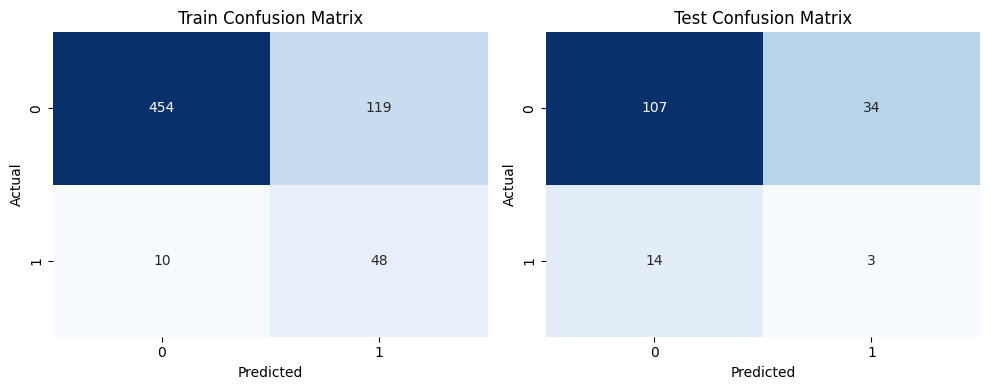

In [719]:
# Lets plot confusion matrix
# confusion_matrix() compares the true labels (y_train, y_test) with the model’s predicted labels (y_train_pred, y_test_pred).
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test  = confusion_matrix(y_test,  y_test_pred)

# 2. Plot side-by-side heat-maps

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# sns.heatmap converts the numeric matrix into a coloured grid
# annot=True writes the raw counts in each cell
# fmt='d' prints them as plain integers
# cmap='Blues' gives a blue colour gradient (light → dark as the count rises)
# cbar=False hides the colour bar (keeps plot compact)
# ax=ax[0] draws it on the left axis

sns.heatmap(cm_train,
            annot=True, fmt='d', cmap='Blues',
            cbar=False, ax=ax[0])
ax[0].set_title('Train Confusion Matrix')
ax[0].set_xlabel('Predicted'); ax[0].set_ylabel('Actual')

sns.heatmap(cm_test,
            annot=True, fmt='d', cmap='Blues',
            cbar=False, ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted'); ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

**Observations:**

Train Confusion Matrix

1. Actual 0 & Predicted 0 which gives True Negatives 441
2. Actual 0 & Predicted 1 which gives False Positive 132
3. Actual 1 & Predicted 0 which gives False Negative 9
4. Actual 1 & Predicted 1 which gives True Positives 49

Hence, training model has predicted good amount of actual class 0, but still getting trouble predicting class 1

Test Confusion Matrix

1. Actual 0 & Predicted 0 which gives True Negatives 104
2. Actual 0 & Predicted 1 which gives False Positive 37
3. Actual 1 & Predicted 0 which gives False Negative 14
4. Actual 1 & Predicted 1 which gives True Positives 3

Hence, testing model gave overall says the same, strong in predicting class 0 but poor in predicting class 1


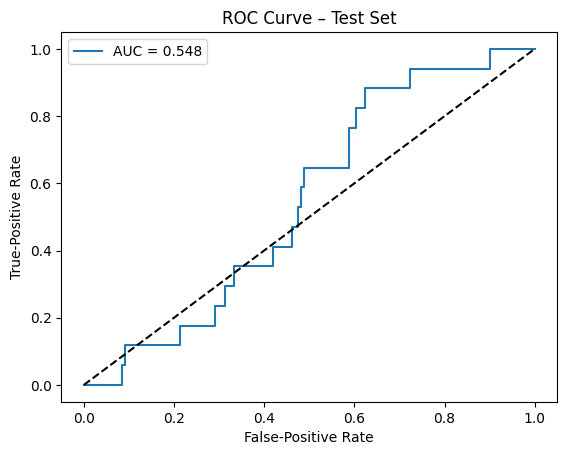

In [720]:
# Plotting ROC_AUC score to see the threshold of the value, if its 1 then model has predicted true values, above 0.5 means model has good prediction
# if its less than 0.5, which means model has very porr preditions

from sklearn.metrics import roc_curve, auc # importing roc_curve, auc from sklearn.metrics

y_test_prob = model.predict_proba(X_test)[:, 1] # y_test_prob will predict the probabilities of positive (1) class

#roc_curve() computes the coordinates for the ROC curve.
#fpr = array of False Positive Rates at various threshold settings
#tpr = array of True Positive Rates (Recall) at corresponding thresholds
# _ = the thresholds used (not needed here)

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False-Positive Rate")
plt.ylabel("True-Positive Rate")
plt.title("ROC Curve – Test Set")
plt.legend(); plt.show()

**Observations:**

ROC_AUC_curve is 0.569 which means the test model has poorly predicted the classes. Due to highly imbalanced classes, model has learned to predict all as class 0 because that class is dominating in the dataset.

**Overall observation on prediction model:**

1. Class-Imbalance Still Dominates the Outcome

- Class 0 (on-time) vastly outnumbers class 1 (late), so the model continues to favour predicting 0, even after adding class_weight='balanced'

2. Training Set - High Recall but Many False Positives

- Accuracy 77 % shows moderate overall fit

- Recall 84 % and FN = 9 indicate the model now captures most late returns in training

- Precision 27 % and FP = 132 reveal a large false-alarm rate

3. Test Set - Generalisation Weak

- Accuracy 67 % drops sharply and Precision 0.7 %, Recall 17 %, F1 10 %

- Only 3 true positives out of 17 late cases; 37 false positives

- Confusion-matrix split: TN 104 / FP 37 / FN 14 / TP 3

- Indicates over-fitting: the model learned training quirks that don't carry over

4. ROC-AUC 0.569 - Poor Separation

- Confirms features and class balance still give limited discriminative power on unseen data

5. Key Root Causes

- Severe imbalance: class 1 too rare for the model to learn robust patterns

- Small sample size amplifies variance between train and test

- Threshold left at 0.50; with imbalanced data, late-return probabilities seldom exceed that cut-off

6. Recommended Next Actions

- Data: gather more late-return examples; incorporate external signals (closures, seasonality).

# **Odds Ratio:**

Odds are chance of late return divided by chances of not being returned late

Odds ratio tells how strongly the feature (column) related to positive outcome which means late return

It is derived from logistic regression coefficient e^B

Interpreting odds ratio:

 1 = means no effect

 <1 = means less strongly correlated to positive outcome

 >1 = means more strongly correlated to positive outcome


Coefficient:

Coefficient B(beta) represents the influence of feature on positive outcome (late return)

Interpreting coefficient:

0 = means no effect

>0 = means strong effect on positive outcome

<0 = less likely to positive outcome



In [721]:
# Calculating Odds ratio to check which features has high correlation with leat returns

coefs  = model.coef_[0]     # Logistic model fit coefficient
odds   = np.exp(coefs)     # odds calculated as exponent to coefficient (beta)
features = X_train.columns      # features means all the columns of final dataset

odds_df = (
    pd.DataFrame({"Feature": features,
                  "Coefficient": coefs,
                  "Odds_Ratio": odds})
      .sort_values("Odds_Ratio", ascending=False)
)   # forming dataframe of features, their coefficient and odds ratio

print("\nTop odds ratios:")
display(odds_df.head(10))


Top odds ratios:


,Feature,Coefficient,Odds_Ratio
31,occupation_ADMIN&SUPPORT,1.143661,3.138237
7,name_x_ MULTNOMAH COUNTY LIBRARY SELLWOOD ...,1.121661,3.069950
332,"authors_['Yoram (Jerry) Wind', 'Catharine Find...",0.941829,2.564667
63,title_Beyond Advertising,0.941829,2.564667
348,categories_['Computers'],0.821485,2.273874
34,occupation_EDUCATION&HEALTH,0.793010,2.210039
202,"authors_['C.A. Brebbia', 'A. Kungolos']",0.790370,2.204212
179,title_Water Resources Management IV,0.790370,2.204212
6,name_x_ MULTNOMAH COUNTY LIBRARY HOLLYWOOD L...,0.773538,2.167421
213,"authors_['David Alexander', 'Simon Archer']",0.758700,2.135499


**Observations:**

1. This model shows Customers belonging to 'Admin and Support' occupation has higher chances of returning the book late. But we saw earlier that 'Business and Finance' background customer shows higher late return. This error can be due to less number of dataset in df_final which was used for logistic regression

2. Library 'Multinomah County Library Sellwood' have higher chances of their books returning late

3. According to the model, Book author name 'Yoram (Jerry) Wind', 'Catharine Find' written books has high chances of late return

4. According to the model, Title of the book 'Beyond Advertising' has higher chances of late return


**Conclusion:**

Considering that model is not too strong to identify the correct prediction of classes, we will not consider the results from odds ratio of this model. It gave quite opposite results from what we have identified from EDA. As this model has lesser data points than previous dataset which was used for EDA, may be that is why results are not as expected. Hence, we will not move forward with the results we got from odds ratio.


# Insights and Recommendations from above findings:

**Insights:**

1. Seasonal Peaks in Late Returns

- Late-return rates are highest in April (4th month), August (8th month), and December (12th month).

2. Branch with the Greatest Problem

- Multnomah County Library, 205 NE Russell St, Portland, OR shows the highest late-return rate at 13.04 %, the worst among all branches analyzed.

3. High-Risk Age Segment

- Patrons aged 51-65 are the most likely to return books late. No patrons over 80 appear in the data.

4. Occupational Hot Spot

- Borrowers working in Business & Finance account for the largest share of late returns.

5. Education Pattern

- The majority of late-return patrons have missing education data; the next-largest group holds a college degree.

6. Gender Skew

- Male patrons register the highest late-return count across genders.

7. Book Category with Most Overdues

- Agriculture titles have the greatest proportion of late returns.

8. High-Risk Author

- Books by “Khan & Jain” exhibit the highest late-return frequency.

9. Price Band at Risk

- Titles priced $400-$500 are most commonly returned late; no books in the data cost more than $700.

10. Length Matters

- Volumes of 1100-1300 pages are late most often; no books exceed 1 300 pages.

11. Most-Overdue Title

- “Resources and Opportunities of Montana” records the highest average lateness.

12. Model Limitations

- The logistic-regression model performs poorly due to severe class imbalance and extensive missing values. Performance metrics are therefore unreliable.

13. Odds-Ratio Caveat

- Odds-ratio results conflict with earlier EDA because many rows drop out during model training (null values). These coefficients should not be used for decision-making.



**Recommendations to the library:**

1. Seasonal spikes in April, August & December

- Enable automatic one-click renewals or a courtesy-renew window that opens 7 days before the due date.

- Send extra email / SMS reminders 3 days before items are due.
(Helps cut late fees tied to finals, holidays, and library closures)

2. Branch with highest late-return rate (205 NE Russell St, 13 %)

- Install fast-drop return bins and QR-code “renew here” signage.

- Pilot the predictive model at this branch first; show staff a “Likely to be late” alert at checkout.

3. High-risk user segments (age 51-65, male, Business & Finance occupation, college-educated or missing education)

- Add a risk flag in patron records to trigger tailored reminders (“Return or renew before your trip tap here”)

- Offer optional push-notification or voice-call reminders.

4. High-value / long books (price >$400 or pages > 1 100)

- Shorten the default loan period (e.g., 14 - 7 days) or require a small deposit.

- Allow partial renewals (keep the book but pay a sliding fee).
(Keeps expensive or lengthy books circulating instead of bottlenecked)

5. High-demand categories & authors
(categories = Agriculture, authors = “Khan & Jain")

- Place these items in a limited-loan or reference-only section.

- Offer digital copies or on-site scanning where copyright permits.
(Reduces backlog while maintaining access)

6. Real-time risk scoring

- Embed the logistic model in the Library System to display a live risk score at checkout.

- If risk, prompt staff to offer an automatic renewal

7. Missing education information = higher lateness

- Prompt patrons to update education info during online renewals; reward with a one-time fine waiver.

- Treat missing education as a high-risk feature in the model.
(Improves data quality and prediction accuracy)

8. Book title with highest late return: loan it for fewer days with no renewal option

- Helps library to circulate the books to other interested customers

8. Improving model performances:

- Gathering more data from libraries and not having major differences between classes 0 or 1 to get more precise predictions

# How would you present your findings to them to get buy-in?

1. Start with the Why (Problem Statement):

- Late returns cause availability delays, user dissatisfaction, and resource strain

- We wanted to identify patterns behind late returns and build a predictive model to mitigate the issue

2. Summarize Key Insights (story via visuals)

- Late returns peak in April, August and December - likely due to exams, holidays, and closures

- The library at 205 NE Russell St has the highest late-return rate (13%)

- People aged 51-65, in Business & Finance occupations, and those with missing education info are most prone to late returns

- Books that are long (>1100 pages), expensive (> $400), or related to Agriculture have higher late return risk

- Show book titles which has higher late returns comparatively

3. Show the Model's Capabilities Simply

- Once we have strong predictive model, we can present it to them and show that our model can predict which books are likely to be returned late, based on user, book, and checkout data

- This will help them identify likelihood of possible late returns and take steps accordingly by sending out reminder emails or renewal emails

4. Explain the Business Value

- If we reduce late returns by even 10%, we increase book circulation, improve user satisfaction, and save on manual follow-up

- This lets staff proactively intervene before returns are late

5. Offer Clear, Practical Recommendations

- Present a short list of low-lift, high-impact actions

- For example: Enable automatic renewals in April/August/December

- Shorten loan period for high-risk books

- Add return reminders for at-risk user segments

6. Address Model Limitations Transparently

- The model performs well on training data, but needs more late-return data to improve test accuracy

- We're using a balanced approach to reduce bias from class imbalance

7. End with a Call to Action

- We'd like to pilot this model at the highest-risk branch and scale up once more data is collected

- We need support to integrate the model into the circulation system and begin collecting more late-return records